<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tests-LSTM+GRU" data-toc-modified-id="Tests-LSTM+GRU-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tests LSTM+GRU</a></span></li><li><span><a href="#Tests-1D-CNN" data-toc-modified-id="Tests-1D-CNN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tests 1D CNN</a></span></li><li><span><a href="#Hyperparameter-Tunning-3-1D-CNN-Layers" data-toc-modified-id="Hyperparameter-Tunning-3-1D-CNN-Layers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hyperparameter Tunning 3 1D CNN Layers</a></span></li><li><span><a href="#Hyperparameter-Tunning-2-1D-CNN-Layers" data-toc-modified-id="Hyperparameter-Tunning-2-1D-CNN-Layers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tunning 2 1D CNN Layers</a></span></li><li><span><a href="#Realtime-Code-Prediction" data-toc-modified-id="Realtime-Code-Prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Realtime Code Prediction</a></span></li><li><span><a href="#Test-2-1D-CNN-Layers-+-3-GRU-Layers" data-toc-modified-id="Test-2-1D-CNN-Layers-+-3-GRU-Layers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test 2 1D CNN Layers + 3 GRU Layers</a></span></li><li><span><a href="#Hyperparameter-Tunning-2-1D-CNN-Layers-+-3-GRU" data-toc-modified-id="Hyperparameter-Tunning-2-1D-CNN-Layers-+-3-GRU-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hyperparameter Tunning 2 1D CNN Layers + 3 GRU</a></span></li><li><span><a href="#Hyperparameter-Tuning-3-GRU-Layers" data-toc-modified-id="Hyperparameter-Tuning-3-GRU-Layers-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Hyperparameter Tuning 3 GRU Layers</a></span></li><li><span><a href="#Hyperparameter-Tuning-3-LSTM-Layers" data-toc-modified-id="Hyperparameter-Tuning-3-LSTM-Layers-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Hyperparameter Tuning 3 LSTM Layers</a></span></li></ul></div>

In [71]:
import mediapipe as mp
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
import gc
from operator import add

In [72]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [34]:
cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(static_image_mode=False,
                          model_complexity=1) as holistic:
    while True:
        ret, frame = cap.read()
        if ret == False:
            break
            
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(frame_rgb)
        # Left hand
        mp_drawing.draw_landmarks(
            frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))

        # Right Hand
        mp_drawing.draw_landmarks(
            frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))
        frame = cv2.flip(frame, 1)
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [35]:
results

mediapipe.python.solution_base.SolutionOutputs

In [67]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [68]:
#pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [73]:
def extract_keypoints(results):
#    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
#    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [70]:
result_test = extract_keypoints(results)

In [71]:
result_test

array([ 7.43505716e-01,  5.80908656e-01, -2.22882434e-07,  6.98685884e-01,
        4.84532773e-01,  5.52124811e-06,  6.33862078e-01,  3.98926407e-01,
       -2.04850640e-02,  5.96809089e-01,  3.28482985e-01, -3.93200293e-02,
        5.85219800e-01,  2.58186400e-01, -5.92463352e-02,  6.23788118e-01,
        4.24972117e-01, -8.08212832e-02,  5.30919075e-01,  4.96071279e-01,
       -1.01158269e-01,  5.60930610e-01,  4.94205832e-01, -9.70083773e-02,
        5.91108024e-01,  4.75766271e-01, -9.16086733e-02,  6.39775515e-01,
        4.98824894e-01, -9.26869363e-02,  5.43323934e-01,  5.66367149e-01,
       -1.10677905e-01,  5.75817883e-01,  5.54231405e-01, -9.62681845e-02,
        6.10079765e-01,  5.35649121e-01, -8.92921165e-02,  6.54698372e-01,
        5.69881082e-01, -1.00024670e-01,  5.69783449e-01,  6.16313517e-01,
       -1.12538032e-01,  5.99672735e-01,  6.01728141e-01, -8.95816013e-02,
        6.31523788e-01,  5.83196938e-01, -7.73787871e-02,  6.67799294e-01,
        6.30341530e-01, -

In [138]:
def signvideodataframe(filepath):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)

    # Define the path to the videos directory
    path = 'file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/'

    # Create a 'Path' column by concatenating the path with 'Video file' column
    df['Path'] = path + df['Video file']
    
#    df['Gloss'] = df['Gloss'].str.replace('\d+', '',regex=True)

    # Calculate the frequency of each gloss and create a 'frequency' column
    df['Frequency'] = df['Gloss'].map(df['Gloss'].value_counts())

    # Sort the DataFrame by the 'Gloss' column
    df = df.sort_values(by='Gloss')

    # Reset the index of the DataFrame
    df = df.reset_index(drop=True)

    return df

In [74]:
def frames_from_file(filepath):
    cap = cv2.VideoCapture(filepath)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    length = round(frames / fps)
    return frames, fps, length

In [143]:
traindf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/train.csv')

In [144]:
traindf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
0,P31,3827306090663467-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
1,P37,16792698524451422-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
2,P11,6868778695018762-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
3,P11,6870709051348651-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
4,P50,0719792557216079-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15


In [145]:
traindf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
40149,P37,9716493262876276-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
40150,P31,7550572181460327-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
40151,P46,47985881750082227-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
40152,P50,04671245574824856-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
40153,P51,19959052532136146-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15


In [146]:
traindf['Path'][0]

'file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/videos/3827306090663467-1 DOLLAR.mp4'

In [147]:
cap = cv2.VideoCapture(traindf['Path'][0])
#cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(static_image_mode=False,
                          model_complexity=1) as holistic:
    while True:
        ret, frame = cap.read()
        if ret == False:
            break
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(frame_rgb)
        # Left hand
        mp_drawing.draw_landmarks(
            frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))

        # Right Hand
        mp_drawing.draw_landmarks(
            frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))

        frame = cv2.flip(frame, 1)
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

In [148]:
traindf.sample(20)

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
35124,P27,9168808558890975-TEAR RIP_1.mp4,TEARRIP1,G_03_009,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
27120,P30,43186034191720846-PROCESS.mp4,PROCESS,E_03_055,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,14
30146,P37,9316615833737427-SELF.mp4,SELF,H_01_015,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,14
11371,P14,6907625605458065-EMPTY.mp4,EMPTY1,E_02_072,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,14
16538,P50,8257819899330097-HEAR 2.mp4,HEAR2,J_02_006,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
10732,P37,44433152891227934-EACH.mp4,EACH,F_02_059,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,16
26705,P43,6039981156837309-POSTPONE.mp4,POSTPONE,H_01_012,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,14
24975,P51,681940747961352-PEACE.mp4,PEACE,B_01_089,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
9447,P50,8460522216545616-DINOSAUR 2.mp4,DINOSAUR2,K_03_047,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,14
1008,P50,08987704939517926-APART.mp4,APART,E_02_033,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,16


In [149]:
traindf = traindf[traindf['Frequency'] > 17]
traindf = traindf.reset_index(drop=True)

In [150]:
traindf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
0,P52,07157565148825373-seedAXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19
1,P28,7179300005186042-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19
2,P29,16216064841959765-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19
3,P37,6193814382865199-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19
4,P40,5947453960317015-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19


In [151]:
traindf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
945,P50,9161417844146778-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,20
946,P14,00930662603221255-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,20
947,P27,82063651021682-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,20
948,P40,5268072837528903-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,20
949,P40,6363286086951516-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,20


In [152]:
traindf.describe()

,Frequency
count,950.000000
mean,19.082105
std,1.316026
min,18.000000
25%,18.000000
50%,19.000000
75%,20.000000
max,24.000000


In [153]:
#traindf['Gloss'] = traindf['Gloss'].str.replace('\d+', '',regex=True)

In [154]:
traindf['Gloss'].nunique()

50

In [155]:
words = traindf['Gloss'].unique()
words

array(['AXE1', 'BACKPACK1', 'BASKETBALL1', 'BEE1', 'BELT1', 'BITE1',
       'BREAKFAST1', 'CANCER1', 'CHRISTMAS1', 'CONFUSED1', 'DARK1',
       'DEAF1', 'DECIDE1', 'DEMAND1', 'DEVELOP1', 'DINNER1', 'DOG1',
       'DOWNSIZE1', 'DRAG1', 'EAT1', 'EDIT1', 'ELEVATOR1', 'FINE1',
       'FLOAT1', 'FOREIGNER1', 'GUESS1', 'HALLOWEEN1', 'HOSPITAL1',
       'HURDLE/TRIP1', 'JEWELRY', 'KNIGHT1', 'LOCK1', 'LUNCH1', 'MAPLE',
       'MEAT1', 'MECHANIC1', 'MICROSCOPE1', 'MOVIE1', 'NOON1', 'PARTY1',
       'PATIENT2', 'RAZOR2', 'RIVER1', 'ROCKINGCHAIR1', 'SHAVE1', 'SINK',
       'SQUEEZE', 'THEY1', 'TWINS1', 'WHATFOR1'], dtype=object)

In [156]:
valdf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/val.csv') 

In [157]:
valdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
0,P26,22595012150860327-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,3
1,P39,7421622940519235-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,3
2,P21,686738356933241-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,3
3,P12,9219095671540121-5 DOLLARS.mp4,5DOLLARS,B_01_062,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
4,P21,1448188216215387-5 DOLLARS.mp4,5DOLLARS,B_01_062,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4


In [158]:
valdf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
10299,P21,6959326205750493-ZOOM IN.mp4,ZOOMIN,B_02_056,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,3
10300,P12,7758716133684984-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
10301,P39,844134294032034-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
10302,P21,5548062993721732-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
10303,P26,19366754134806952-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4


In [159]:
testdf = signvideodataframe('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/splits/test.csv')

In [160]:
testdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
0,P18,23521769221811684-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13
1,P42,023931338852502426-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13
2,P49,4893817008748198-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13
3,P17,13991818149960333-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13
4,P49,34625615110480457-1 DOLLAR.mp4,1DOLLAR,C_02_025,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13


In [161]:
testdf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
32936,P18,4320702510886756-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13
32937,P9,7676354653247301-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13
32938,P47,5386272465310649-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13
32939,P18,738440364224181-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13
32940,P17,9953298353288469-ZOOM OFF.mp4,ZOOMOFF,D_01_057,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,13


In [162]:
valdf = valdf[valdf['Gloss'].isin(words)]
valdf = valdf.reset_index(drop=True)

In [163]:
valdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
0,P39,19778675091674147-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
1,P26,8581142177964065-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
2,P39,3877478645046861-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
3,P21,8521417940364975-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
4,P5,9990244640190733-BACKPACK.mp4,BACKPACK1,G_03_091,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,3


In [164]:
valdf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
186,P26,032677896012150764-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5
187,P5,6523145816470133-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5
188,P39,0283886564670357-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5
189,P21,6142521746642153-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5
190,P12,06408604416165864-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5


In [165]:
valdf['Gloss'].nunique()

50

In [166]:
valdf.describe()

,Frequency
count,191.000000
mean,3.963351
std,0.770316
min,3.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,6.000000


In [167]:
valdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
0,P39,19778675091674147-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
1,P26,8581142177964065-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
2,P39,3877478645046861-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
3,P21,8521417940364975-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4
4,P5,9990244640190733-BACKPACK.mp4,BACKPACK1,G_03_091,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,3


In [168]:
testdf = testdf[testdf['Gloss'].isin(words)]
testdf = testdf.reset_index(drop=True)

In [169]:
testdf['Gloss'].nunique()

50

In [170]:
testdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
0,P15,33721516025652254-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
1,P47,519067006979435-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
2,P35,5104381603195376-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
3,P42,44458614013793873-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15
4,P42,9604797909481075-AXE.mp4,AXE1,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,15


In [171]:
testdf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency
724,P42,3448123355846451-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18
725,P47,034046510887022485-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18
726,P22,9359050586202402-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18
727,P42,2748457214117681-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18
728,P15,540014801916062-WHAT FOR.mp4,WHATFOR1,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18


In [172]:
testdf.describe()

,Frequency
count,729.000000
mean,14.978052
std,2.229192
min,9.000000
25%,14.000000
50%,15.000000
75%,16.000000
max,20.000000


In [173]:
traindf['Gloss'] = traindf['Gloss'].str.replace('\d+', '',regex=True)
valdf['Gloss'] = valdf['Gloss'].str.replace('\d+', '',regex=True)
testdf['Gloss'] = testdf['Gloss'].str.replace('\d+', '',regex=True)

In [174]:
words = traindf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [175]:
words = valdf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [176]:
words = testdf['Gloss'].unique()
words

array(['AXE', 'BACKPACK', 'BASKETBALL', 'BEE', 'BELT', 'BITE',
       'BREAKFAST', 'CANCER', 'CHRISTMAS', 'CONFUSED', 'DARK', 'DEAF',
       'DECIDE', 'DEMAND', 'DEVELOP', 'DINNER', 'DOG', 'DOWNSIZE', 'DRAG',
       'EAT', 'EDIT', 'ELEVATOR', 'FINE', 'FLOAT', 'FOREIGNER', 'GUESS',
       'HALLOWEEN', 'HOSPITAL', 'HURDLE/TRIP', 'JEWELRY', 'KNIGHT',
       'LOCK', 'LUNCH', 'MAPLE', 'MEAT', 'MECHANIC', 'MICROSCOPE',
       'MOVIE', 'NOON', 'PARTY', 'PATIENT', 'RAZOR', 'RIVER',
       'ROCKINGCHAIR', 'SHAVE', 'SINK', 'SQUEEZE', 'THEY', 'TWINS',
       'WHATFOR'], dtype=object)

In [177]:
print(traindf['Gloss'].nunique())
print(valdf['Gloss'].nunique())
print(testdf['Gloss'].nunique())

50
50
50


In [178]:
cap = cv2.VideoCapture(traindf.Path[4])
#cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(static_image_mode=False,
                          model_complexity=1) as holistic:
    while True:
        ret, frame = cap.read()
        if ret == False:
            break
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(frame_rgb)

        # Mano izquieda (azul)
        mp_drawing.draw_landmarks(
            frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))

        # Mano derecha (verde)
        mp_drawing.draw_landmarks(
            frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))

        frame = cv2.flip(frame, 1)
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

In [75]:
# Define a function to extract keypoints from a single video file
def extract_keypoints_from_file(filepath):
    # Initialize a MediaPipe Holistic model
    holistic = mp.solutions.holistic.Holistic(static_image_mode=False,
                                              model_complexity=1,
                                              min_detection_confidence=0.5,
                                              min_tracking_confidence=0.5)

    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB color space
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Use the Holistic model to detect landmarks for the face, pose, and hands
        results = holistic.process(frame)

        # Extract the keypoints from the results object and append them to the keypoints list
        keypoints.append(extract_keypoints(results))

    # Release the video capture object and the Holistic model
    cap.release()
    holistic.close()

    return np.array(keypoints)

In [180]:
# Define a function to extract keypoints from a single video file
def extract_keypoints_from_file_flip(filepath):
    # Initialize a MediaPipe Holistic model
    holistic = mp.solutions.holistic.Holistic(static_image_mode=False,
                                              model_complexity=1,
                                              min_detection_confidence=0.5,
                                              min_tracking_confidence=0.5)

    # Open the video file
    cap = cv2.VideoCapture(filepath)

    # Initialize an empty list to store the keypoints for each frame
    keypoints = []

    # Loop through the frames of the video
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB color space
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.flip(frame, 1)
        # Use the Holistic model to detect landmarks for the face, pose, and hands
        results = holistic.process(frame)

        # Extract the keypoints from the results object and append them to the keypoints list
        keypoints.append(extract_keypoints(results))

    # Release the video capture object and the Holistic model
    cap.release()
    holistic.close()

    return np.array(keypoints)

In [181]:
extract_keypoints_from_file(traindf.Path[0]).shape

(100, 126)

In [182]:
test=extract_keypoints_from_file_flip(traindf.Path[0])
test[30]

array([ 7.96414077e-01,  9.08715069e-01,  9.07866706e-08,  7.49651492e-01,
        8.64592910e-01, -9.06617753e-03,  7.18871355e-01,  8.13641608e-01,
       -1.42531497e-02,  7.00173020e-01,  7.75223196e-01, -2.11012661e-02,
        6.85313523e-01,  7.38832355e-01, -2.72529013e-02,  7.53686905e-01,
        7.23692119e-01,  1.10347848e-02,  7.51472771e-01,  6.68876708e-01,
        1.31220720e-03,  7.49525487e-01,  6.38742685e-01, -1.18946834e-02,
        7.46116936e-01,  6.16605282e-01, -2.20092256e-02,  7.77112484e-01,
        7.26227760e-01,  5.35163376e-03,  7.76386797e-01,  6.63936794e-01,
       -3.61846294e-03,  7.73537099e-01,  6.33621931e-01, -1.52370287e-02,
        7.68957615e-01,  6.16506398e-01, -2.34815758e-02,  7.99829900e-01,
        7.40132511e-01, -3.79953836e-03,  8.01362157e-01,  6.78541660e-01,
       -1.29196774e-02,  7.97479153e-01,  6.52502894e-01, -1.86225455e-02,
        7.91766882e-01,  6.40358806e-01, -2.22017895e-02,  8.21929336e-01,
        7.65651405e-01, -

In [183]:
test=extract_keypoints_from_file(traindf.Path[0])
test[30]

array([ 7.41789162e-01,  4.14220452e-01, -8.04981610e-08,  7.52606869e-01,
        3.70309889e-01,  2.84047537e-02,  7.49311566e-01,  3.29515249e-01,
        4.10141498e-02,  7.39953101e-01,  3.03338051e-01,  4.79311235e-02,
        7.29388475e-01,  2.87711948e-01,  5.33078238e-02,  7.54872143e-01,
        2.95699596e-01,  2.53431760e-02,  7.42109537e-01,  2.41008013e-01,
        2.82448940e-02,  7.27952123e-01,  2.12981150e-01,  3.09054554e-02,
        7.15792120e-01,  1.95877552e-01,  3.31397988e-02,  7.44172215e-01,
        2.90129274e-01,  1.05545465e-02,  7.29215205e-01,  2.24516720e-01,
        1.45581122e-02,  7.13301122e-01,  1.93701595e-01,  1.77212693e-02,
        7.00190902e-01,  1.74026877e-01,  1.94902867e-02,  7.28045106e-01,
        2.91374683e-01, -2.65448634e-03,  7.14913905e-01,  2.26463526e-01,
        8.32793710e-04,  7.00475335e-01,  1.94862932e-01,  1.59235217e-03,
        6.88417256e-01,  1.72671020e-01,  9.31388815e-04,  7.07076907e-01,
        2.96958238e-01, -

In [184]:
cap = cv2.VideoCapture(traindf.Path[0])
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

100


In [185]:
type(extract_keypoints_from_file(traindf.Path[643]))

numpy.ndarray

In [186]:
traindf.count()

Participant ID    950
Video file        950
Gloss             950
ASL-LEX Code      950
Path              950
Frequency         950
dtype: int64

In [187]:
def frames_from_file(filepath):
    cap = cv2.VideoCapture(filepath)
    frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    length = round(frames / fps)
    return frames, fps, length

In [188]:
frames_from_file(traindf.Path[0])

(100, 31, 3)

In [189]:
tqdm.pandas()
traindf[['Frames', 'FPS', 'Length']] = traindf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 950/950 [00:47<00:00, 19.94it/s]


In [190]:
traindf['Frames'].max()

540

In [191]:
traindf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length
0,P52,07157565148825373-seedAXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19,100,31,3
1,P28,7179300005186042-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19,81,30,3
2,P29,16216064841959765-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19,47,30,2
3,P37,6193814382865199-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19,67,30,2
4,P40,5947453960317015-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,19,89,30,3


In [192]:
traindf.describe()

,Frequency,Frames,FPS,Length
count,950.000000,950.000000,950.000000,950.000000
mean,19.082105,87.755789,29.354737,3.016842
std,1.316026,46.654745,2.197195,1.568167
min,18.000000,25.000000,11.000000,1.000000
25%,18.000000,60.000000,29.000000,2.000000
50%,19.000000,77.000000,30.000000,3.000000
75%,20.000000,97.000000,30.000000,3.000000
max,24.000000,540.000000,31.000000,18.000000


In [193]:
traindf = traindf[(traindf['Length'] > 1) & (traindf['FPS'] > 28) &(traindf['Frames'] < 131) ]
#filtered_df = traindf[(traindf['Frames'] > 0) & (traindf['Frames'] < 121)]
#filtered_df = traindf[traindf['Frames'] > 0]
traindf= traindf.reset_index(drop=True)
traindf.describe()

,Frequency,Frames,FPS,Length
count,804.000000,804.000000,804.000000,804.000000
mean,19.084577,76.113184,29.680348,2.593284
std,1.305343,20.091965,0.479790,0.671427
min,18.000000,45.000000,29.000000,2.000000
25%,18.000000,60.000000,29.000000,2.000000
50%,19.000000,74.000000,30.000000,2.000000
75%,20.000000,88.000000,30.000000,3.000000
max,24.000000,130.000000,31.000000,4.000000


In [194]:
traindf['Frequency'] = traindf['Gloss'].map(traindf['Gloss'].value_counts())
#traindf = traindf.sort_values(by='Frequency',)

traindf.describe()

,Frequency,Frames,FPS,Length
count,804.000000,804.000000,804.000000,804.000000
mean,16.261194,76.113184,29.680348,2.593284
std,1.722009,20.091965,0.479790,0.671427
min,13.000000,45.000000,29.000000,2.000000
25%,15.000000,60.000000,29.000000,2.000000
50%,16.000000,74.000000,30.000000,2.000000
75%,17.000000,88.000000,30.000000,3.000000
max,20.000000,130.000000,31.000000,4.000000


In [195]:
traindf.head(10)

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length
0,P52,07157565148825373-seedAXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,100,31,3
1,P28,7179300005186042-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,81,30,3
2,P29,16216064841959765-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,47,30,2
3,P37,6193814382865199-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,67,30,2
4,P40,5947453960317015-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,89,30,3
5,P40,929570016067665-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,112,29,4
6,P16,904767261814883-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,64,30,2
7,P43,016134052760367945-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,75,30,2
8,P40,23099527328070546-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,91,29,3
9,P37,21310388087265242-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,18,69,30,2


In [196]:
print(traindf['Gloss'].nunique())

50


In [197]:
tqdm.pandas()
valdf[['Frames', 'FPS', 'Length']] = valdf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 191/191 [00:09<00:00, 20.67it/s]


In [198]:
valdf['Frames'].max()

207

In [199]:
valdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length
0,P39,19778675091674147-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4,121,30,4
1,P26,8581142177964065-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4,81,29,3
2,P39,3877478645046861-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4,120,30,4
3,P21,8521417940364975-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4,71,29,2
4,P5,9990244640190733-BACKPACK.mp4,BACKPACK,G_03_091,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,3,93,29,3


In [200]:
valdf.describe()

,Frequency,Frames,FPS,Length
count,191.000000,191.000000,191.000000,191.000000
mean,3.963351,88.905759,29.706806,3.000000
std,0.770316,36.214006,0.456423,1.248157
min,3.000000,37.000000,29.000000,1.000000
25%,3.000000,61.500000,29.000000,2.000000
50%,4.000000,76.000000,30.000000,3.000000
75%,4.000000,117.500000,30.000000,4.000000
max,6.000000,207.000000,30.000000,7.000000


In [201]:
valdf = valdf[(valdf['Length'] > 1) & (valdf['FPS'] > 28) &(valdf['Frames'] < 131) ]
#filtered_df = traindf[(traindf['Frames'] > 0) & (traindf['Frames'] < 121)]
#filtered_df = traindf[traindf['Frames'] > 0]
valdf = valdf.reset_index(drop=True)
valdf.describe()

,Frequency,Frames,FPS,Length
count,162.000000,162.000000,162.000000,162.000000
mean,3.993827,78.203704,29.691358,2.623457
std,0.760001,23.787397,0.463365,0.772311
min,3.000000,45.000000,29.000000,2.000000
25%,3.000000,59.250000,29.000000,2.000000
50%,4.000000,71.500000,30.000000,2.000000
75%,4.000000,92.000000,30.000000,3.000000
max,6.000000,130.000000,30.000000,4.000000


In [202]:
valdf['Frequency'] = valdf['Gloss'].map(valdf['Gloss'].value_counts())
#valdf = valdf.sort_values(by='Frequency',)

valdf.describe()

,Frequency,Frames,FPS,Length
count,162.000000,162.000000,162.000000,162.000000
mean,3.506173,78.203704,29.691358,2.623457
std,0.907162,23.787397,0.463365,0.772311
min,2.000000,45.000000,29.000000,2.000000
25%,3.000000,59.250000,29.000000,2.000000
50%,4.000000,71.500000,30.000000,2.000000
75%,4.000000,92.000000,30.000000,3.000000
max,5.000000,130.000000,30.000000,4.000000


In [203]:
print(valdf['Gloss'].nunique())

50


In [204]:
testdf['Path'] = testdf['Path'].str.replace('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/', 'file:///home/kristian/ASL_Citizen/',regex=True)

In [205]:
tqdm.pandas()
testdf[['Frames', 'FPS', 'Length']] = testdf['Path'].progress_apply(lambda x: pd.Series(frames_from_file(x)))

100%|█████████████████████████████████████████| 729/729 [00:24<00:00, 30.17it/s]


In [206]:
testdf['Frames'].max()

234

In [207]:
testdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length
0,P15,33721516025652254-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/33721...,15,196,29,7
1,P47,519067006979435-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/51906...,15,102,26,4
2,P35,5104381603195376-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/51043...,15,70,29,2
3,P42,44458614013793873-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/44458...,15,57,30,2
4,P42,9604797909481075-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/96047...,15,66,30,2


In [208]:
testdf.describe()

,Frequency,Frames,FPS,Length
count,729.000000,729.000000,729.000000,729.000000
mean,14.978052,75.192044,28.696845,2.624143
std,2.229192,27.848864,3.113689,1.003439
min,9.000000,10.000000,14.000000,0.000000
25%,14.000000,56.000000,29.000000,2.000000
50%,15.000000,73.000000,30.000000,3.000000
75%,16.000000,90.000000,30.000000,3.000000
max,20.000000,234.000000,31.000000,8.000000


In [209]:
testdf = testdf[(testdf['Length'] > 1) & (testdf['FPS'] > 28) &(testdf['Frames'] < 131) ]
#filtered_df = traindf[(traindf['Frames'] > 0) & (traindf['Frames'] < 121)]
#filtered_df = traindf[traindf['Frames'] > 0]
testdf = testdf.reset_index(drop=True)
testdf.describe()

,Frequency,Frames,FPS,Length
count,534.000000,534.000000,534.000000,534.000000
mean,15.014981,77.256554,29.702247,2.619850
std,2.217904,19.420007,0.526337,0.670792
min,9.000000,45.000000,29.000000,2.000000
25%,14.000000,61.000000,29.000000,2.000000
50%,15.000000,75.000000,30.000000,3.000000
75%,16.000000,91.000000,30.000000,3.000000
max,20.000000,130.000000,31.000000,4.000000


In [210]:
testdf['Frequency'] = testdf['Gloss'].map(testdf['Gloss'].value_counts())
#testdf = testdf.sort_values(by='Frequency',)

testdf.describe()

,Frequency,Frames,FPS,Length
count,534.000000,534.000000,534.000000,534.000000
mean,11.254682,77.256554,29.702247,2.619850
std,2.311308,19.420007,0.526337,0.670792
min,5.000000,45.000000,29.000000,2.000000
25%,10.000000,61.000000,29.000000,2.000000
50%,12.000000,75.000000,30.000000,3.000000
75%,13.000000,91.000000,30.000000,3.000000
max,15.000000,130.000000,31.000000,4.000000


In [211]:
print(testdf['Gloss'].nunique())

50


In [212]:
traindf['Path'] = traindf['Path'].str.replace('file:///media/kristian/HDD/ASL_Citizen/ASL_Citizen/', 'file:///home/kristian/ASL_Citizen/',regex=True)

In [108]:
keypoints_series = traindf['Path'].progress_apply(extract_keypoints_from_file)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_keypoints.npy", keypoints_series)

100%|███████████████████████████████████████| 804/804 [1:09:21<00:00,  5.18s/it]


In [177]:
keypoints_series = traindf['Path'].progress_apply(extract_keypoints_from_file_flip)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_keypoints_flip.npy", keypoints_series)

100%|███████████████████████████████████████| 804/804 [1:10:32<00:00,  5.26s/it]


In [178]:
keypoints_series.shape

(804,)

In [110]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_keypoints.npy", keypoints_series)

In [111]:
import numpy as np
keypoints_series=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_keypoints.npy",allow_pickle=True)

In [130]:
max(keypoints.shape[0] for keypoints in keypoints_series)

130

In [129]:
min(keypoints.shape[0] for keypoints in keypoints_series)


45

In [131]:
max_len = traindf['Frames'].max()

In [132]:
max_len

130

In [116]:
#keypoints_np = np.zeros((len(keypoints_series), max_len, 126))
#for i, keypoints in enumerate(keypoints_series):
#    keypoints_np[i, :keypoints.shape[0], :] = keypoints

In [115]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(keypoints_series), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(keypoints_series):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

In [116]:
keypoints_np.shape

(804, 130, 1662)

In [117]:
print(keypoints_np[6])

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.49487716  0.39238185 -1.29218626 ...  0.          0.
   0.        ]
 [ 0.49096876  0.39365393 -1.30090356 ...  0.          0.
   0.        ]
 [ 0.48817223  0.39431143 -1.3236835  ...  0.          0.
   0.        ]]


In [119]:
keypoints_np.shape

(804, 130, 1662)

In [117]:
keypoints_series = valdf['Path'].progress_apply(extract_keypoints_from_file)

100%|█████████████████████████████████████████| 162/162 [13:46<00:00,  5.10s/it]


In [118]:
keypoints_series.shape

(162,)

In [119]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/val_keypoints.npy", keypoints_series)

In [120]:
import numpy as np
keypoints_series=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe/val_keypoints.npy",allow_pickle=True)

In [121]:
keypoints_series.shape

(162,)

In [125]:
#keypoints_np = np.zeros((len(keypoints_series), max_len, 126))
#for i, keypoints in enumerate(keypoints_series):
#    keypoints_np[i, :keypoints.shape[0], :] = keypoints

In [126]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(keypoints_series), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(keypoints_series):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

In [127]:
keypoints_np.shape

(162, 130, 1662)

In [128]:
keypoints_np.shape

(162, 130, 1662)

In [129]:
keypoints_np

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.5595299 ,  0.3205725 , -1.27106977, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55954963,  0.32069033, -1.25959992, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55960971,  0.3209095 , -1.23169589, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.5183838 ,  0.33223236, -1.15552998, ...,  

In [123]:
keypoints_series = testdf['Path'].progress_apply(extract_keypoints_from_file)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_keypoints.npy", keypoints_series)

100%|█████████████████████████████████████████| 534/534 [45:17<00:00,  5.09s/it]


In [179]:
keypoints_series = testdf['Path'].progress_apply(extract_keypoints_from_file_flip)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_keypoints_flip.npy", keypoints_series)
keypoints_series = valdf['Path'].progress_apply(extract_keypoints_from_file_flip)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/val_keypoints_flip.npy", keypoints_series)

100%|█████████████████████████████████████████| 162/162 [15:07<00:00,  5.60s/it]


In [113]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_keypoints.npy", keypoints_series)

(705,)

In [116]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe/test_keypoints.npy", keypoints_np)

In [127]:
import numpy as np
keypoints_series=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_keypoints.npy", allow_pickle=True)

In [128]:
keypoints_series.shape

(534,)

In [ ]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(keypoints_series), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(keypoints_series):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]

In [114]:
keypoints_np = np.zeros((len(keypoints_series), max_len, 126))
for i, keypoints in enumerate(keypoints_series):
    keypoints_np[i, :keypoints.shape[0], :] = keypoints

In [115]:
keypoints_np.shape

(705, 130, 1662)

In [118]:
keypoints_np.shape

(705, 130, 1662)

# Preprocessing

In [76]:
import numpy as np
train_keypoints=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_keypoints.npy",allow_pickle=True)
val_keypoints =np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/val_keypoints.npy",allow_pickle=True)
test_keypoints=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_keypoints.npy",allow_pickle=True)

print('Training Keypoints Shape:', train_keypoints.shape)
print('Validation Kepoints Shape:', val_keypoints.shape)
print('Test Keypoints Shape:',test_keypoints.shape)

Training Keypoints Shape: (804,)
Validation Kepoints Shape: (162,)
Test Keypoints Shape: (534,)


In [77]:
train_keypoints_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_keypoints_flip.npy",allow_pickle=True)
val_keypoints_flip =np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/val_keypoints_flip.npy",allow_pickle=True)
test_keypoints_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_keypoints_flip.npy",allow_pickle=True)

print('Training Keypoints Shape:', train_keypoints_flip.shape)
print('Validation Kepoints Shape:', val_keypoints_flip.shape)
print('Test Keypoints Shape:',test_keypoints_flip.shape)

Training Keypoints Shape: (804,)
Validation Kepoints Shape: (162,)
Test Keypoints Shape: (534,)


In [78]:
max_len=130

In [79]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(train_keypoints), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(train_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
train_keypoints = keypoints_np
print('Training Keypoints Shape:', train_keypoints.shape)

Training Keypoints Shape: (804, 130, 126)


In [80]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(val_keypoints), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(val_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
val_keypoints = keypoints_np
print('Validation Keypoints Shape:', val_keypoints.shape)

Validation Keypoints Shape: (162, 130, 126)


In [81]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(test_keypoints), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(test_keypoints):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
test_keypoints = keypoints_np
print('Test Keypoints Shape:', test_keypoints.shape)

Test Keypoints Shape: (534, 130, 126)


In [82]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(train_keypoints_flip), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(train_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
train_keypoints_flip = keypoints_np
print('Training Keypoints Shape:', train_keypoints_flip.shape)

Training Keypoints Shape: (804, 130, 126)


In [83]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(val_keypoints_flip), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(val_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
val_keypoints_flip = keypoints_np
print('Validation Keypoints Shape:', val_keypoints_flip.shape)

Validation Keypoints Shape: (162, 130, 126)


In [84]:
# Create a padded array to store keypoints
keypoints_np = np.zeros((len(test_keypoints_flip), max_len, 126))

# Iterate through keypoints_series and fill keypoints_np with pre-padding
for i, keypoints in enumerate(test_keypoints_flip):
    keypoints_len = min(keypoints.shape[0], max_len)
    padding_len = max_len - keypoints_len
    keypoints_np[i, padding_len:, :] = keypoints[:keypoints_len, :]
    
test_keypoints_flip = keypoints_np
print('Test Keypoints Shape:', test_keypoints_flip.shape)

Test Keypoints Shape: (534, 130, 126)


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from keras.utils import to_categorical
import numpy as np
#from keras.preprocessing.sequence import pad_sequences

In [140]:
traindf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length
0,P52,07157565148825373-seedAXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/07157...,18,100,31,3
1,P28,7179300005186042-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/71793...,18,81,30,3
2,P29,16216064841959765-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/16216...,18,47,30,2
3,P37,6193814382865199-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/61938...,18,67,30,2
4,P40,5947453960317015-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/59474...,18,89,30,3


In [141]:
encoder = OrdinalEncoder()

In [142]:
traindf['Cat_label'] = encoder.fit_transform(traindf[['Gloss']]).astype(int)
traindf = traindf.sort_values(by='Gloss',)

In [143]:
traindf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length,Cat_label
0,P52,07157565148825373-seedAXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/07157...,18,100,31,3,0
17,P37,29360158406046777-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/29360...,18,73,30,2,0
16,P27,053394218351220823-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/05339...,18,52,29,2,0
15,P40,10598328043940142-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/10598...,18,81,29,3,0
14,P50,3937261764308986-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/39372...,18,72,30,2,0


In [144]:
traindf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length,Cat_label
789,P40,6445331634562388-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/64453...,16,89,30,3,49
788,P37,6237575353180616-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/62375...,16,56,30,2,49
802,P40,5268072837528903-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/52680...,16,92,29,3,49
794,P37,16185522171162914-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/16185...,16,64,30,2,49
803,P40,6363286086951516-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/63632...,16,65,29,2,49


In [145]:
valdf['Cat_label'] = encoder.fit_transform(valdf[['Gloss']]).astype(int)
valdf = valdf.sort_values(by='Gloss',)

In [146]:
valdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length,Cat_label
0,P39,19778675091674147-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4,121,30,4,0
1,P26,8581142177964065-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4,81,29,3,0
2,P39,3877478645046861-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4,120,30,4,0
3,P21,8521417940364975-AXE.mp4,AXE,G_03_066,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,4,71,29,2,0
4,P5,9990244640190733-BACKPACK.mp4,BACKPACK,G_03_091,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,3,93,29,3,1


In [147]:
valdf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length,Cat_label
159,P39,0283886564670357-WHAT FOR.mp4,WHATFOR,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5,121,30,4,49
160,P21,6142521746642153-WHAT FOR.mp4,WHATFOR,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5,57,30,2,49
157,P26,032677896012150764-WHAT FOR.mp4,WHATFOR,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5,81,29,3,49
158,P5,6523145816470133-WHAT FOR.mp4,WHATFOR,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5,116,30,4,49
161,P12,06408604416165864-WHAT FOR.mp4,WHATFOR,C_02_054,file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...,5,71,30,2,49


In [148]:
testdf['Cat_label'] = encoder.fit_transform(testdf[['Gloss']]).astype(int)
testdf = testdf.sort_values(by='Gloss',)

In [149]:
testdf.head()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length,Cat_label
0,P35,5104381603195376-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/51043...,11,70,29,2,0
1,P42,44458614013793873-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/44458...,11,57,30,2,0
2,P42,9604797909481075-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/96047...,11,66,30,2,0
3,P9,30728048195204827-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/30728...,11,96,30,3,0
4,P6,28522130623160047-AXE.mp4,AXE,G_03_066,file:///home/kristian/ASL_Citizen/videos/28522...,11,54,29,2,0


In [150]:
testdf.tail()

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length,Cat_label
522,P6,6734748834983595-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/67347...,13,66,29,2,49
521,P17,33051835760678294-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/33051...,13,52,31,2,49
532,P42,2748457214117681-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/27484...,13,74,30,2,49
526,P42,9684934734400592-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/96849...,13,89,30,3,49
533,P15,540014801916062-WHAT FOR.mp4,WHATFOR,C_02_054,file:///home/kristian/ASL_Citizen/videos/54001...,13,79,29,3,49


In [151]:
label_map = {label:num for num, label in enumerate(traindf['Gloss'].unique())}

In [152]:
label_map

{'AXE': 0,
 'BACKPACK': 1,
 'BASKETBALL': 2,
 'BEE': 3,
 'BELT': 4,
 'BITE': 5,
 'BREAKFAST': 6,
 'CANCER': 7,
 'CHRISTMAS': 8,
 'CONFUSED': 9,
 'DARK': 10,
 'DEAF': 11,
 'DECIDE': 12,
 'DEMAND': 13,
 'DEVELOP': 14,
 'DINNER': 15,
 'DOG': 16,
 'DOWNSIZE': 17,
 'DRAG': 18,
 'EAT': 19,
 'EDIT': 20,
 'ELEVATOR': 21,
 'FINE': 22,
 'FLOAT': 23,
 'FOREIGNER': 24,
 'GUESS': 25,
 'HALLOWEEN': 26,
 'HOSPITAL': 27,
 'HURDLE/TRIP': 28,
 'JEWELRY': 29,
 'KNIGHT': 30,
 'LOCK': 31,
 'LUNCH': 32,
 'MAPLE': 33,
 'MEAT': 34,
 'MECHANIC': 35,
 'MICROSCOPE': 36,
 'MOVIE': 37,
 'NOON': 38,
 'PARTY': 39,
 'PATIENT': 40,
 'RAZOR': 41,
 'RIVER': 42,
 'ROCKINGCHAIR': 43,
 'SHAVE': 44,
 'SINK': 45,
 'SQUEEZE': 46,
 'THEY': 47,
 'TWINS': 48,
 'WHATFOR': 49}

In [153]:
traindf.sample(10)

,Participant ID,Video file,Gloss,ASL-LEX Code,Path,Frequency,Frames,FPS,Length,Cat_label
197,P11,93340344109002-DEAF.mp4,DEAF,F_03_038,file:///home/kristian/ASL_Citizen/videos/93340...,18,52,29,2,11
190,P50,6965626273607881-DEAF.mp4,DEAF,F_03_038,file:///home/kristian/ASL_Citizen/videos/69656...,18,63,30,2,11
671,P50,37298532610460033-RAZOR 2.mp4,RAZOR,K_03_103,file:///home/kristian/ASL_Citizen/videos/37298...,13,60,30,2,41
278,P27,635034042192421-DOG.mp4,DOG,A_01_056,file:///home/kristian/ASL_Citizen/videos/63503...,20,49,30,2,16
99,P29,2296487888208607-BITE.mp4,BITE,K_02_045,file:///home/kristian/ASL_Citizen/videos/22964...,19,45,30,2,5
639,P37,9047865551380374-PARTY.mp4,PARTY,G_02_059,file:///home/kristian/ASL_Citizen/videos/90478...,20,75,30,2,39
554,P29,3817632832150144-MEAT.mp4,MEAT,D_02_022,file:///home/kristian/ASL_Citizen/videos/38176...,16,52,30,2,34
762,P27,4163876725261626-THEY.mp4,THEY,F_02_103,file:///home/kristian/ASL_Citizen/videos/41638...,14,45,30,2,47
779,P43,9855459225573504-TWINS.mp4,TWINS,F_01_032,file:///home/kristian/ASL_Citizen/videos/98554...,17,69,29,2,48
30,P40,14052296225070893-BACKPACK.mp4,BACKPACK,G_03_091,file:///home/kristian/ASL_Citizen/videos/14052...,17,88,30,3,1


In [154]:
Ytrain = encoder.fit_transform(traindf[['Gloss']])
Ytest = encoder.fit_transform(testdf[['Gloss']])
Yval = encoder.fit_transform(valdf[['Gloss']])

In [155]:
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_labels_array_1D.npy", Ytrain)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_labels_array_1D.npy", Ytest)
np.save("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/val_labels_array_1D.npy", Yval)

In [86]:
Ytrain=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_labels_array_1D.npy")
Ytest=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_labels_array_1D.npy")
Yval=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/val_labels_array_1D.npy")
Ytrain_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/train_labels_array_1D.npy")
Ytest_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/test_labels_array_1D.npy")
Yval_flip=np.load("/home/kristian/Capstone/keypoints/ASL_Citizen/Mediapipe_hands/val_labels_array_1D.npy")


In [87]:
Xtrain = train_keypoints
Xtest = test_keypoints
Xval = val_keypoints
Xtrain_flip = train_keypoints_flip
Xtest_flip = test_keypoints_flip
Xval_flip = val_keypoints_flip

In [88]:
Xval = val_keypoints
Xval_flip = val_keypoints_flip

In [89]:
n_classes = 50
print("Shape before one-hot encoding: ", Ytrain.shape)
Ytrain = to_categorical(Ytrain, n_classes)
print("Shape after one-hot encoding: ", Ytrain.shape)
print("Shape before one-hot encoding: ", Ytest.shape)
Ytest = to_categorical(Ytest, n_classes)
print("Shape after one-hot encoding: ", Ytest.shape)
print("Shape before one-hot encoding: ", Yval.shape)
Yval = to_categorical(Yval, n_classes)
print("Shape after one-hot encoding: ", Yval.shape)
print("Shape before one-hot encoding: ", Ytrain_flip.shape)
Ytrain_flip = to_categorical(Ytrain_flip, n_classes)
print("Shape after one-hot encoding: ", Ytrain_flip.shape)
print("Shape before one-hot encoding: ", Ytest_flip.shape)
Ytest_flip = to_categorical(Ytest_flip, n_classes)
print("Shape after one-hot encoding: ", Ytest_flip.shape)
print("Shape before one-hot encoding: ", Yval_flip.shape)
Yval_flip = to_categorical(Yval_flip, n_classes)
print("Shape after one-hot encoding: ", Yval_flip.shape)

Shape before one-hot encoding:  (804, 1)
Shape after one-hot encoding:  (804, 50)
Shape before one-hot encoding:  (534, 1)
Shape after one-hot encoding:  (534, 50)
Shape before one-hot encoding:  (162, 1)
Shape after one-hot encoding:  (162, 50)
Shape before one-hot encoding:  (804, 1)
Shape after one-hot encoding:  (804, 50)
Shape before one-hot encoding:  (534, 1)
Shape after one-hot encoding:  (534, 50)
Shape before one-hot encoding:  (162, 1)
Shape after one-hot encoding:  (162, 50)


In [90]:
type(Ytrain)

numpy.ndarray

In [91]:
Ytrain.shape

(804, 50)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=10)

In [92]:
Xtrain = np.concatenate((Xtrain, Xtest,Xtrain_flip,Xtest_flip), axis=0)
print(Xtrain.shape)
Ytrain = np.concatenate((Ytrain, Ytest, Ytrain_flip, Ytest_flip), axis=0)
print(Ytrain.shape)

(2676, 130, 126)
(2676, 50)


In [93]:
Xval.shape

(162, 130, 126)

In [94]:
Xval_flip.shape

(162, 130, 126)

In [95]:
Xval = np.concatenate((Xval, Xval_flip), axis=0)
print(Xval.shape)
Yval = np.concatenate((Yval, Yval_flip), axis=0)
print(Yval.shape)

(324, 130, 126)
(324, 50)


In [478]:
print(Xtrain.shape)
Xval.shape

(2676, 130, 126)


(324, 130, 126)

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaletrain = np.concatenate((Xtrain, Xval), axis=0)
num_samples, num_frames, num_keypoints = scaletrain.shape
scaletrain = scaletrain.reshape(num_samples, -1)

num_samples, num_frames, num_keypoints = Xtrain.shape
Xtrain = Xtrain.reshape(num_samples, -1)

# Create a MinMaxScaler
scaler = StandardScaler()
scaler.fit(scaletrain)
# Fit and transform the data
Xtrain = scaler.transform(Xtrain)

# Reshape the scaled data back to the original shape
Xtrain = Xtrain.reshape(num_samples, num_frames, num_keypoints)

In [97]:
num_samples, num_frames, num_keypoints = Xval.shape
Xval = Xval.reshape(num_samples, -1)

# Fit and transform the data
Xval = scaler.transform(Xval)

# Reshape the scaled data back to the original shape
Xval = Xval.reshape(num_samples, num_frames, num_keypoints)

In [437]:
dum = Xval.reshape(num_samples,-1)
dum.shape

(324, 16380)

In [98]:
Xtrain.shape

(2676, 130, 126)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data_scaled,
                                                    Y,
                                                    test_size=0.,
                                                    random_state=10)

NameError: name 'input_data_scaled' is not defined

In [99]:
print(Xtrain.shape)
Xtest.shape

(2676, 130, 126)


(534, 130, 126)

In [100]:
print(Ytrain.shape)
Ytest.shape

(2676, 50)


(534, 50)

In [101]:
Xtrain

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.01826046, -0.01826046, -0.01826046, ..., -0.01826046,
         -0.01826046,  0.01826046],
        ...,
        [-0.09277351, -0.09416112,  0.0630041 , ..., -0.08927153,
         -0.09610105,  0.0644035 ],
        [-0.09265238, -0.09410899,  0.05735369, ..., -0.08544984,
         -0.0928632 ,  0.05570659],
        [-0.09600275, -0.09762298,  0.05645958, ..., -0.082588  ,
         -0.09053308,  0.02852582]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.01826046, -0.01826046, -0.01826046, ..., -0.01826046,
         -0.01826046,  0.01826046],
        ...,
        [-0.09277351, -0.09416112,  0.0630041 , ..., -

In [54]:
Ytrain

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [420]:
Yval.shape

(324, 50)

In [421]:
Xval.shape

(324, 130, 126)

# Model

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam ,Adagrad, Adadelta, SGD
import os


In [103]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
tf.random.set_seed(100)

In [104]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

## Tests LSTM+GRU

In [106]:
max_len = 130

In [68]:
model = Sequential(name='Sequential')
act_function = 'tanh'
model.add(LSTM(180, return_sequences=True, activation=act_function, input_shape=(130,126)))
model.add(LSTM(90, return_sequences=True, activation=act_function))
#model.add(LSTM(180, return_sequences=True, activation=act_function))
model.add(LSTM(90, return_sequences=False,activation=act_function))
#model.add(Dense(90, activation=act_function))
#model.add(Dense(90, activation=act_function))
#model.add(Dense(90, activation=act_function))
#model.add(Dense(90, activation=act_function))
#model.add(Dense(45, activation=act_function))
model.add(Dense(90, activation=act_function))
model.add(Dense(50, activation=act_function))
model.summary()

optimizer = SGD(learning_rate=.00001,nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(Xtrain, Ytrain, epochs=1000, validation_split=.2, batch_size = 64)

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 130, 180)          221040    
                                                                 
 lstm_3 (LSTM)               (None, 130, 90)           97560     
                                                                 
 lstm_4 (LSTM)               (None, 90)                65160     
                                                                 
 dense_10 (Dense)            (None, 90)                8190      
                                                                 
 dense_11 (Dense)            (None, 50)                4550      
                                                                 
Total params: 396500 (1.51 MB)
Trainable params: 396500 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
34/34 [

KeyboardInterrupt: 

In [170]:
model = Sequential(name='Sequential')
act_function = 'tanh'
model.add(GRU(64, return_sequences=True, activation=act_function, input_shape=(130,126)))
model.add(GRU(64, return_sequences=False, activation=act_function))
model.add(Dense(64, activation=act_function))
model.add(Dense(50, activation=act_function))
optimizer = Adagrad(learning_rate=.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(Xtrain, Ytrain, epochs=1000, validation_split=.2, batch_size = 64)
model.summary()

Epoch 1/1000


2023-08-10 19:37:31.086458: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


17/17 [==============================] - 7s 64ms/step - loss: 8.5475 - categorical_accuracy: 0.0234 - val_loss: 8.1678 - val_categorical_accuracy: 0.0000e+00
Epoch 2/1000
17/17 [==============================] - 0s 26ms/step - loss: 7.7508 - categorical_accuracy: 0.0271 - val_loss: 7.6328 - val_categorical_accuracy: 0.0000e+00
Epoch 3/1000
17/17 [==============================] - 0s 26ms/step - loss: 8.9888 - categorical_accuracy: 0.0243 - val_loss: 8.2151 - val_categorical_accuracy: 0.0522
Epoch 4/1000
17/17 [==============================] - 0s 25ms/step - loss: 9.8813 - categorical_accuracy: 0.0243 - val_loss: 7.1391 - val_categorical_accuracy: 0.0000e+00
Epoch 5/1000
17/17 [==============================] - 0s 25ms/step - loss: 8.5391 - categorical_accuracy: 0.0280 - val_loss: 10.0403 - val_categorical_accuracy: 0.0000e+00
Epoch 6/1000
17/17 [==============================] - 0s 27ms/step - loss: 6.3260 - categorical_accuracy: 0.0290 - val_loss: 7.3463 - val_categorical_accuracy: 0

Epoch 49/1000
17/17 [==============================] - 0s 25ms/step - loss: 7.4271 - categorical_accuracy: 0.0262 - val_loss: 6.2155 - val_categorical_accuracy: 0.0000e+00
Epoch 50/1000
17/17 [==============================] - 0s 25ms/step - loss: 7.7637 - categorical_accuracy: 0.0252 - val_loss: 8.3997 - val_categorical_accuracy: 0.0000e+00
Epoch 51/1000
17/17 [==============================] - 0s 26ms/step - loss: 7.7397 - categorical_accuracy: 0.0224 - val_loss: 7.5216 - val_categorical_accuracy: 0.0000e+00
Epoch 52/1000
17/17 [==============================] - 0s 25ms/step - loss: 7.5803 - categorical_accuracy: 0.0187 - val_loss: 8.2021 - val_categorical_accuracy: 0.0000e+00
Epoch 53/1000
17/17 [==============================] - 0s 25ms/step - loss: 7.8845 - categorical_accuracy: 0.0299 - val_loss: 8.2387 - val_categorical_accuracy: 0.0000e+00
Epoch 54/1000
17/17 [==============================] - 0s 26ms/step - loss: 7.7295 - categorical_accuracy: 0.0271 - val_loss: 6.6656 - val_c

Epoch 97/1000
17/17 [==============================] - 0s 26ms/step - loss: 7.7295 - categorical_accuracy: 0.0280 - val_loss: 6.0611 - val_categorical_accuracy: 0.0000e+00
Epoch 98/1000
17/17 [==============================] - 0s 25ms/step - loss: 7.6836 - categorical_accuracy: 0.0252 - val_loss: 5.3140 - val_categorical_accuracy: 0.0000e+00
Epoch 99/1000
17/17 [==============================] - 0s 25ms/step - loss: 7.6254 - categorical_accuracy: 0.0271 - val_loss: 7.3098 - val_categorical_accuracy: 0.0000e+00
Epoch 100/1000
17/17 [==============================] - 0s 25ms/step - loss: 7.7652 - categorical_accuracy: 0.0290 - val_loss: 5.8322 - val_categorical_accuracy: 0.0000e+00
Epoch 101/1000
17/17 [==============================] - 0s 25ms/step - loss: 7.6242 - categorical_accuracy: 0.0336 - val_loss: 7.9454 - val_categorical_accuracy: 0.0000e+00
Epoch 102/1000
17/17 [==============================] - 0s 26ms/step - loss: 7.5506 - categorical_accuracy: 0.0243 - val_loss: 7.8198 - va

KeyboardInterrupt: 

In [171]:
model = Sequential()

act_function = 'LeakyReLU'
model.add(LSTM(64, return_sequences=True, activation=act_function, input_shape=(130,126)))
model.add(GRU(128, return_sequences=True, activation=act_function))
model.add(LSTM(64, return_sequences=False, activation=act_function))
model.add(Dense(64, activation=act_function))
model.add(Dense(32, activation=act_function))
model.add(Dense(50, activation='softmax'))
optimizer = SGD(learning_rate=.0000005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(Xtrain, Ytrain, epochs=1000, validation_split=.2, batch_size = 32, callbacks=[tb_callback])
model.summary()

Epoch 1/1000
34/34 [==============================] - 24s 563ms/step - loss: 3.9129 - categorical_accuracy: 0.0280 - val_loss: 3.9095 - val_categorical_accuracy: 0.0000e+00
Epoch 2/1000
34/34 [==============================] - 18s 534ms/step - loss: 3.9129 - categorical_accuracy: 0.0280 - val_loss: 3.9095 - val_categorical_accuracy: 0.0000e+00
Epoch 3/1000
34/34 [==============================] - 18s 528ms/step - loss: 3.9129 - categorical_accuracy: 0.0280 - val_loss: 3.9095 - val_categorical_accuracy: 0.0000e+00
Epoch 4/1000
34/34 [==============================] - 17s 512ms/step - loss: 3.9129 - categorical_accuracy: 0.0280 - val_loss: 3.9095 - val_categorical_accuracy: 0.0000e+00
Epoch 5/1000
14/34 [===========>..................] - ETA: 10s - loss: 3.9135 - categorical_accuracy: 0.0290

KeyboardInterrupt: 

In [172]:
model = Sequential(name='Sequential') #good, overfitting

act_function = 'LeakyReLU'
model.add(GRU(128, return_sequences=True, activation=act_function, input_shape=(130,126)))
model.add(GRU(128, return_sequences=False, activation=act_function))
#model.add(LSTM(64, return_sequences=False, activation=act_function))
model.add(Dense(128, activation=act_function, input_shape=(130,126)))
model.add(Dense(128, activation=act_function))
model.add(Dense(64, activation=act_function))
model.add(Dense(50, activation='softmax'))
optimizer = Lion(learning_rate=.00025)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(Xtrain, Ytrain, epochs=1000, validation_split=.4, batch_size = 64, callbacks=[tb_callback])
model.summary()

Epoch 1/1000
13/13 [==============================] - 9s 442ms/step - loss: 3.9150 - categorical_accuracy: 0.0249 - val_loss: 3.9111 - val_categorical_accuracy: 0.0205
Epoch 2/1000
13/13 [==============================] - 5s 412ms/step - loss: 3.9105 - categorical_accuracy: 0.0237 - val_loss: 3.9111 - val_categorical_accuracy: 0.0131
Epoch 3/1000
13/13 [==============================] - 5s 410ms/step - loss: 3.9039 - categorical_accuracy: 0.0224 - val_loss: 3.9114 - val_categorical_accuracy: 0.0205
Epoch 4/1000
13/13 [==============================] - 5s 418ms/step - loss: 3.8937 - categorical_accuracy: 0.0262 - val_loss: 3.9152 - val_categorical_accuracy: 0.0205
Epoch 5/1000
13/13 [==============================] - 5s 416ms/step - loss: 3.8874 - categorical_accuracy: 0.0274 - val_loss: 3.9219 - val_categorical_accuracy: 0.0112
Epoch 6/1000
13/13 [==============================] - 5s 416ms/step - loss: 3.8808 - categorical_accuracy: 0.0187 - val_loss: 3.9215 - val_categorical_accuracy:

13/13 [==============================] - 6s 453ms/step - loss: 0.1663 - categorical_accuracy: 0.9476 - val_loss: 7.7187 - val_categorical_accuracy: 0.3582
Epoch 96/1000
13/13 [==============================] - 6s 462ms/step - loss: 0.1604 - categorical_accuracy: 0.9589 - val_loss: 7.9065 - val_categorical_accuracy: 0.3675
Epoch 97/1000
13/13 [==============================] - 6s 462ms/step - loss: 0.2348 - categorical_accuracy: 0.9377 - val_loss: 7.6548 - val_categorical_accuracy: 0.3731
Epoch 98/1000
13/13 [==============================] - 6s 461ms/step - loss: 0.2026 - categorical_accuracy: 0.9377 - val_loss: 7.6788 - val_categorical_accuracy: 0.3619
Epoch 99/1000
13/13 [==============================] - 6s 451ms/step - loss: 0.1327 - categorical_accuracy: 0.9539 - val_loss: 7.5109 - val_categorical_accuracy: 0.3638
Epoch 100/1000
13/13 [==============================] - 6s 461ms/step - loss: 0.1414 - categorical_accuracy: 0.9514 - val_loss: 7.2929 - val_categorical_accuracy: 0.3489

13/13 [==============================] - 6s 462ms/step - loss: 0.0572 - categorical_accuracy: 0.9825 - val_loss: 7.4264 - val_categorical_accuracy: 0.4347
Epoch 192/1000
13/13 [==============================] - 6s 465ms/step - loss: 0.0595 - categorical_accuracy: 0.9813 - val_loss: 8.1414 - val_categorical_accuracy: 0.4347
Epoch 193/1000
13/13 [==============================] - 6s 464ms/step - loss: 0.0871 - categorical_accuracy: 0.9713 - val_loss: 7.8970 - val_categorical_accuracy: 0.4347
Epoch 194/1000
13/13 [==============================] - 6s 472ms/step - loss: 0.0746 - categorical_accuracy: 0.9751 - val_loss: 8.1593 - val_categorical_accuracy: 0.4328
Epoch 195/1000
13/13 [==============================] - 6s 466ms/step - loss: 0.0704 - categorical_accuracy: 0.9738 - val_loss: 8.0066 - val_categorical_accuracy: 0.4515
Epoch 196/1000
13/13 [==============================] - 6s 467ms/step - loss: 0.0665 - categorical_accuracy: 0.9825 - val_loss: 8.0449 - val_categorical_accuracy: 0.

13/13 [==============================] - 6s 479ms/step - loss: 0.0561 - categorical_accuracy: 0.9863 - val_loss: 9.1304 - val_categorical_accuracy: 0.4627
Epoch 288/1000
13/13 [==============================] - 6s 472ms/step - loss: 0.0606 - categorical_accuracy: 0.9825 - val_loss: 9.1830 - val_categorical_accuracy: 0.4478
Epoch 289/1000
13/13 [==============================] - 6s 483ms/step - loss: 0.0690 - categorical_accuracy: 0.9838 - val_loss: 9.6757 - val_categorical_accuracy: 0.4664
Epoch 290/1000
13/13 [==============================] - 6s 482ms/step - loss: 0.0844 - categorical_accuracy: 0.9751 - val_loss: 9.7388 - val_categorical_accuracy: 0.4701
Epoch 291/1000
13/13 [==============================] - 6s 473ms/step - loss: 0.0720 - categorical_accuracy: 0.9763 - val_loss: 9.2409 - val_categorical_accuracy: 0.4720
Epoch 292/1000
13/13 [==============================] - 6s 474ms/step - loss: 0.0556 - categorical_accuracy: 0.9850 - val_loss: 8.9168 - val_categorical_accuracy: 0.

KeyboardInterrupt: 

In [173]:
res = model.predict(Xval)

6/6 [==============================] - 1s 66ms/step


In [174]:
np.argmax(res[100])

43

In [175]:
np.argmax(Yval[100])

31

In [52]:
model = Sequential(name='Sequential') ##best

act_function = 'LeakyReLU'
model.add(GRU(32, return_sequences=False, activation=act_function, dropout=.5,input_shape=(130,126)))
#model.add(GRU(128, return_sequences=True, activation=act_function))
#model.add(LSTM(64, return_sequences=False, activation=act_function))
model.add(Dense(32, activation=act_function))
#model.add(Dense(64, activation=act_function))
model.add(Dense(16, activation=act_function))
model.add(Dropout(.3))
model.add(Dense(50, activation='softmax'))
optimizer = Lion(learning_rate=.00005,global_clipnorm=.25)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(Xtrain, Ytrain, epochs=1000, validation_split=.3, batch_size = 64, callbacks=[tb_callback])
model.summary()

Epoch 1/1000
30/30 [==============================] - 8s 215ms/step - loss: 3.9204 - categorical_accuracy: 0.0144 - val_loss: 3.9345 - val_categorical_accuracy: 0.0249
Epoch 2/1000
30/30 [==============================] - 6s 191ms/step - loss: 3.9167 - categorical_accuracy: 0.0160 - val_loss: 3.9284 - val_categorical_accuracy: 0.0386
Epoch 3/1000
30/30 [==============================] - 6s 192ms/step - loss: 3.9122 - categorical_accuracy: 0.0208 - val_loss: 3.9255 - val_categorical_accuracy: 0.0174
Epoch 4/1000
30/30 [==============================] - 6s 190ms/step - loss: 3.9099 - categorical_accuracy: 0.0203 - val_loss: 3.9239 - val_categorical_accuracy: 0.0174
Epoch 5/1000
30/30 [==============================] - 6s 193ms/step - loss: 3.9066 - categorical_accuracy: 0.0230 - val_loss: 3.9242 - val_categorical_accuracy: 0.0174
Epoch 6/1000
30/30 [==============================] - 6s 191ms/step - loss: 3.9071 - categorical_accuracy: 0.0182 - val_loss: 3.9249 - val_categorical_accuracy:

KeyboardInterrupt: 

In [51]:
model = Sequential(name='Sequential') #chingon

act_function = 'selu'
model.add(GRU(64, return_sequences=False, activation=act_function, dropout=.5,kernel_initializer='he_uniform',input_shape=(130,126)))
#model.add(GRU(128, return_sequences=True, activation=act_function))
#model.add(LSTM(64, return_sequences=False, activation=act_function))
model.add(Dense(32, activation=act_function))
#model.add(Dense(64, activation=act_function))
model.add(Dense(16, activation=act_function))
model.add(Dropout(.3))
model.add(Dense(50, activation='softmax'))
optimizer = Lion(learning_rate=.005,global_clipnorm=10)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(Xtrain, Ytrain, epochs=5000, validation_split=.4, batch_size = 64, callbacks=[tb_callback])
model.summary()

2023-08-11 09:51:02.420040: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


Epoch 1/5000


2023-08-11 09:51:05.936031: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff908411900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-11 09:51:05.936057: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX250, Compute Capability 6.1
2023-08-11 09:51:05.940241: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-11 09:51:05.953295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-11 09:51:06.015538: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 [==============================] - 9s 241ms/step - loss: 4.0962 - categorical_accuracy: 0.0168 - val_loss: 4.0085 - val_categorical_accuracy: 0.0065
Epoch 2/5000
26/26 [==============================] - 4s 158ms/step - loss: 3.9604 - categorical_accuracy: 0.0249 - val_loss: 3.9157 - val_categorical_accuracy: 0.0336
Epoch 3/5000
26/26 [==============================] - 4s 164ms/step - loss: 3.8279 - categorical_accuracy: 0.0336 - val_loss: 3.7152 - val_categorical_accuracy: 0.0327
Epoch 4/5000
26/26 [==============================] - 4s 166ms/step - loss: 3.6075 - categorical_accuracy: 0.0561 - val_loss: 3.5930 - val_categorical_accuracy: 0.0401
Epoch 5/5000
26/26 [==============================] - 4s 171ms/step - loss: 3.4629 - categorical_accuracy: 0.0766 - val_loss: 3.6859 - val_categorical_accuracy: 0.0523
Epoch 6/5000
26/26 [==============================] - 5s 173ms/step - loss: 3.3429 - categorical_accuracy: 0.0854 - val_loss: 3.3516 - val_categorical_accuracy: 0.0682
Epoch

KeyboardInterrupt: 

In [178]:
model = Sequential(name='Sequential') 

act_function = 'LeakyReLU'
initializer = 'lecun_uniform'
model.add(GRU(32, return_sequences=True, kernel_initializer=initializer, activation=act_function, dropout=0,input_shape=(130,126)))
model.add(GRU(8, return_sequences=False, activation=act_function))
#model.add(LSTM(64, return_sequences=False, activation=act_function))
model.add(Dense(32, activation=act_function, kernel_initializer=initializer))
model.add(Dense(32, activation=act_function, kernel_initializer=initializer))
model.add(Dense(16, activation=act_function, kernel_initializer=initializer))
#model.add(Dropout(.3))
model.add(Dense(50, activation='softmax'))
optimizer = Lion(learning_rate=.005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(Xtrain, Ytrain, epochs=1000, validation_split=.3, batch_size = 64, callbacks=[tb_callback])
model.summary()

Epoch 1/1000
15/15 [==============================] - 12s 587ms/step - loss: 3.9141 - categorical_accuracy: 0.0192 - val_loss: 3.9452 - val_categorical_accuracy: 0.0000e+00
Epoch 2/1000
15/15 [==============================] - 6s 426ms/step - loss: 3.8960 - categorical_accuracy: 0.0321 - val_loss: 4.0005 - val_categorical_accuracy: 0.0000e+00
Epoch 3/1000
15/15 [==============================] - 6s 415ms/step - loss: 3.8835 - categorical_accuracy: 0.0278 - val_loss: 4.0428 - val_categorical_accuracy: 0.0000e+00
Epoch 4/1000
15/15 [==============================] - 6s 427ms/step - loss: 3.8513 - categorical_accuracy: 0.0417 - val_loss: 3.9643 - val_categorical_accuracy: 0.0274
Epoch 5/1000
15/15 [==============================] - 6s 421ms/step - loss: 3.7220 - categorical_accuracy: 0.0524 - val_loss: 3.7845 - val_categorical_accuracy: 0.0000e+00
Epoch 6/1000
15/15 [==============================] - 6s 432ms/step - loss: 3.5726 - categorical_accuracy: 0.0598 - val_loss: 3.6370 - val_cate

KeyboardInterrupt: 

In [44]:
initializer

NameError: name 'initializer' is not defined

In [45]:
model = Sequential(name='Sequential')

act_function = 'LeakyReLU'
model.add(GRU(128, return_sequences=False, activation=act_function, input_shape=(130,126)))
#model.add(GRU(128, return_sequences=True, activation=act_function))
#model.add(LSTM(64, return_sequences=False, activation=act_function))
model.add(Dense(128, activation=act_function, input_shape=(130,126)))
model.add(Dense(128, activation=act_function))
model.add(Dense(64, activation=act_function))
model.add(Dropout(.2))
model.add(Dense(50, activation='softmax'))
optimizer = Lion(learning_rate=.00025)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history = model.fit(Xtrain, Ytrain, epochs=1000, validation_split=.2, batch_size = 32, callbacks=[tb_callback])
model.summary()

2023-08-08 10:10:09.127784: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 924736800 exceeds 10% of free system memory.
2023-08-08 10:10:09.961623: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 924736800 exceeds 10% of free system memory.


Epoch 1/1000
34/34 [==============================] - 9s 207ms/step - loss: 3.9179 - categorical_accuracy: 0.0224 - val_loss: 4.3422 - val_categorical_accuracy: 0.0000e+00
Epoch 2/1000
34/34 [==============================] - 7s 201ms/step - loss: 3.8832 - categorical_accuracy: 0.0234 - val_loss: 5.0312 - val_categorical_accuracy: 0.0000e+00
Epoch 3/1000
34/34 [==============================] - 7s 192ms/step - loss: 3.8310 - categorical_accuracy: 0.0215 - val_loss: 5.5114 - val_categorical_accuracy: 0.0000e+00
Epoch 4/1000
34/34 [==============================] - 7s 202ms/step - loss: 3.8174 - categorical_accuracy: 0.0271 - val_loss: 5.8857 - val_categorical_accuracy: 0.0000e+00
Epoch 5/1000
34/34 [==============================] - 7s 210ms/step - loss: 3.7950 - categorical_accuracy: 0.0336 - val_loss: 5.7742 - val_categorical_accuracy: 0.0000e+00
Epoch 6/1000
34/34 [==============================] - 7s 212ms/step - loss: 3.7763 - categorical_accuracy: 0.0262 - val_loss: 6.2825 - val_c

KeyboardInterrupt: 

## Tests 1D CNN

In [43]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D

# Define the CNN model
model = Sequential(name='Sequential')
act_function = 'selu'

# Add convolutional layers
model.add(Conv1D(filters=50, kernel_size=2, activation=act_function, input_shape=(130, 126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=100, kernel_size=2, activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50, kernel_size=2, activation=act_function))
model.add(MaxPooling1D(pool_size=2))
#model.add(SpatialDropout1D(0.5))
model.add(Conv1D(filters=100, kernel_size=2, activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(SpatialDropout1D(0.5))

#model.add(Conv1D(filters=50, kernel_size=2, activation=act_function))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='selu', kernel_regularizer=regularizers.l2(l=0.001)))
model.add(MaxPooling1D(pool_size=2))

# droput layer, remove if no work
model.add(SpatialDropout1D(0.5))

# Flatten the output for the fully connected layers
model.add(Flatten())
# Add fully connected layers
model.add(Dense(40, activation=act_function))
model.add(Dense(16, activation=act_function))
#model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
#model.add(Dropout(0.5))
model.add(Dense(50, activation='softmax'))  # Output layer
optimizer = Lion(learning_rate=.00075)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(Xtrain, Ytrain, epochs=5000, validation_split=.3, batch_size = 128, callbacks=[tb_callback])

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 129, 50)           12650     
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 64, 50)            0         
 ng1D)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 63, 100)           10100     
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 31, 100)           0         
 ng1D)                                                           
                                                                 
 conv1d_12 (Conv1D)          (None, 30, 50)            10050     
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 15, 50)            0

Epoch 32/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.1337 - categorical_accuracy: 0.3513 - val_loss: 2.1980 - val_categorical_accuracy: 0.3412
Epoch 33/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.1407 - categorical_accuracy: 0.3679 - val_loss: 2.1737 - val_categorical_accuracy: 0.3425
Epoch 34/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.0837 - categorical_accuracy: 0.3962 - val_loss: 2.1697 - val_categorical_accuracy: 0.3499
Epoch 35/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.0354 - categorical_accuracy: 0.3807 - val_loss: 2.1663 - val_categorical_accuracy: 0.3412
Epoch 36/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.0273 - categorical_accuracy: 0.3951 - val_loss: 2.2525 - val_categorical_accuracy: 0.3300
Epoch 37/5000
15/15 [==============================] - 0s 27ms/step - loss: 2.0277 - categorical_accuracy: 0.4026 - val_loss: 2.1512 - val_categorical_accuracy:

Epoch 81/5000
15/15 [==============================] - 0s 27ms/step - loss: 1.3167 - categorical_accuracy: 0.6044 - val_loss: 1.9463 - val_categorical_accuracy: 0.4633
Epoch 82/5000
15/15 [==============================] - 0s 27ms/step - loss: 1.3047 - categorical_accuracy: 0.6012 - val_loss: 1.7397 - val_categorical_accuracy: 0.4819
Epoch 83/5000
15/15 [==============================] - 0s 28ms/step - loss: 1.2917 - categorical_accuracy: 0.6097 - val_loss: 1.8784 - val_categorical_accuracy: 0.4732
Epoch 84/5000
15/15 [==============================] - 0s 27ms/step - loss: 1.2986 - categorical_accuracy: 0.6070 - val_loss: 1.7948 - val_categorical_accuracy: 0.4807
Epoch 85/5000
15/15 [==============================] - 0s 27ms/step - loss: 1.2531 - categorical_accuracy: 0.6295 - val_loss: 1.8634 - val_categorical_accuracy: 0.4869
Epoch 86/5000
15/15 [==============================] - 0s 27ms/step - loss: 1.2604 - categorical_accuracy: 0.6204 - val_loss: 1.7198 - val_categorical_accuracy:

15/15 [==============================] - 0s 27ms/step - loss: 0.8539 - categorical_accuracy: 0.7806 - val_loss: 1.7826 - val_categorical_accuracy: 0.6090
Epoch 178/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.8016 - categorical_accuracy: 0.7854 - val_loss: 1.9159 - val_categorical_accuracy: 0.5766
Epoch 179/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.8124 - categorical_accuracy: 0.7886 - val_loss: 1.9770 - val_categorical_accuracy: 0.5517
Epoch 180/5000
15/15 [==============================] - 0s 27ms/step - loss: 0.7867 - categorical_accuracy: 0.7912 - val_loss: 1.8922 - val_categorical_accuracy: 0.5791
Epoch 181/5000
15/15 [==============================] - 0s 29ms/step - loss: 0.7878 - categorical_accuracy: 0.7859 - val_loss: 1.8395 - val_categorical_accuracy: 0.5965
Epoch 182/5000
15/15 [==============================] - 0s 27ms/step - loss: 0.7808 - categorical_accuracy: 0.7859 - val_loss: 2.0498 - val_categorical_accuracy: 0.5629
E

15/15 [==============================] - 0s 28ms/step - loss: 0.7219 - categorical_accuracy: 0.8350 - val_loss: 2.0357 - val_categorical_accuracy: 0.5791
Epoch 274/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.7027 - categorical_accuracy: 0.8350 - val_loss: 2.0901 - val_categorical_accuracy: 0.5766
Epoch 275/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.7359 - categorical_accuracy: 0.8334 - val_loss: 2.1743 - val_categorical_accuracy: 0.5641
Epoch 276/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.6781 - categorical_accuracy: 0.8324 - val_loss: 2.2822 - val_categorical_accuracy: 0.5803
Epoch 277/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.7110 - categorical_accuracy: 0.8356 - val_loss: 2.0423 - val_categorical_accuracy: 0.6139
Epoch 278/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.6634 - categorical_accuracy: 0.8414 - val_loss: 2.2474 - val_categorical_accuracy: 0.5666
E

15/15 [==============================] - 0s 28ms/step - loss: 0.9295 - categorical_accuracy: 0.7806 - val_loss: 1.8402 - val_categorical_accuracy: 0.6152
Epoch 370/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.9163 - categorical_accuracy: 0.7811 - val_loss: 1.9252 - val_categorical_accuracy: 0.6102
Epoch 371/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.9060 - categorical_accuracy: 0.7758 - val_loss: 1.8172 - val_categorical_accuracy: 0.6488
Epoch 372/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.8611 - categorical_accuracy: 0.7950 - val_loss: 1.8438 - val_categorical_accuracy: 0.6214
Epoch 373/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.9033 - categorical_accuracy: 0.7891 - val_loss: 1.9361 - val_categorical_accuracy: 0.5990
Epoch 374/5000
15/15 [==============================] - 0s 28ms/step - loss: 0.8228 - categorical_accuracy: 0.8105 - val_loss: 2.0734 - val_categorical_accuracy: 0.5903
E

15/15 [==============================] - 0s 29ms/step - loss: 1.4990 - categorical_accuracy: 0.6369 - val_loss: 2.1277 - val_categorical_accuracy: 0.5467
Epoch 466/5000
15/15 [==============================] - 0s 28ms/step - loss: 1.3938 - categorical_accuracy: 0.6514 - val_loss: 1.9833 - val_categorical_accuracy: 0.5579
Epoch 467/5000
15/15 [==============================] - 0s 29ms/step - loss: 1.3970 - categorical_accuracy: 0.6594 - val_loss: 1.9575 - val_categorical_accuracy: 0.5567
Epoch 468/5000
15/15 [==============================] - 0s 29ms/step - loss: 1.3950 - categorical_accuracy: 0.6679 - val_loss: 1.9613 - val_categorical_accuracy: 0.5554
Epoch 469/5000
15/15 [==============================] - 0s 29ms/step - loss: 1.3942 - categorical_accuracy: 0.6684 - val_loss: 1.8228 - val_categorical_accuracy: 0.5890
Epoch 470/5000
15/15 [==============================] - 0s 29ms/step - loss: 1.3293 - categorical_accuracy: 0.6765 - val_loss: 1.7895 - val_categorical_accuracy: 0.5853
E

15/15 [==============================] - 0s 30ms/step - loss: 0.7355 - categorical_accuracy: 0.8430 - val_loss: 2.3359 - val_categorical_accuracy: 0.5716
Epoch 562/5000
15/15 [==============================] - 0s 33ms/step - loss: 0.6797 - categorical_accuracy: 0.8468 - val_loss: 2.0596 - val_categorical_accuracy: 0.5965
Epoch 563/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.7212 - categorical_accuracy: 0.8377 - val_loss: 2.2593 - val_categorical_accuracy: 0.5753
Epoch 564/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.6749 - categorical_accuracy: 0.8532 - val_loss: 2.2616 - val_categorical_accuracy: 0.5853
Epoch 565/5000
15/15 [==============================] - 0s 31ms/step - loss: 0.7387 - categorical_accuracy: 0.8361 - val_loss: 2.1449 - val_categorical_accuracy: 0.6040
Epoch 566/5000
15/15 [==============================] - 0s 30ms/step - loss: 0.6872 - categorical_accuracy: 0.8521 - val_loss: 2.1336 - val_categorical_accuracy: 0.5990
E

KeyboardInterrupt: 

In [47]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D

# Define the CNN model
model = Sequential(name='Sequential')
act_function = 'selu'

# Add convolutional layers
model.add(Conv1D(filters=50, kernel_size=2, activation=act_function, input_shape=(130, 126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=100, kernel_size=2, activation=act_function))
model.add(MaxPooling1D(pool_size=2))
#model.add(Conv1D(filters=50, kernel_size=2, activation=act_function))
#model.add(MaxPooling1D(pool_size=2))
#model.add(SpatialDropout1D(0.5))
#model.add(Conv1D(filters=100, kernel_size=2, activation=act_function))
#model.add(MaxPooling1D(pool_size=2))
#model.add(SpatialDropout1D(0.5))

#model.add(Conv1D(filters=50, kernel_size=2, activation=act_function))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='selu', kernel_regularizer=regularizers.l2(l=0.001)))
model.add(MaxPooling1D(pool_size=2))

# droput layer, remove if no work
model.add(SpatialDropout1D(0.5))

# Flatten the output for the fully connected layers
model.add(Flatten())
# Add fully connected layers
model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
#model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
#model.add(Dropout(0.5))
model.add(Dense(50, activation='softmax'))  # Output layer
optimizer = Lion(learning_rate=.00075)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(Xtrain, Ytrain, epochs=5000, validation_split=.3, batch_size = 128, callbacks=[tb_callback])

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 129, 50)           12650     
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 64, 50)            0         
 ng1D)                                                           
                                                                 
 conv1d_25 (Conv1D)          (None, 62, 64)            9664      
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 31, 64)            0         
 ng1D)                                                           
                                                                 
 spatial_dropout1d_7 (Spati  (None, 31, 64)            0         
 alDropout1D)                                                    
                                                        

Epoch 88/5000
15/15 [==============================] - 0s 22ms/step - loss: 0.4221 - categorical_accuracy: 0.9092 - val_loss: 3.8767 - val_categorical_accuracy: 0.5230
Epoch 89/5000
15/15 [==============================] - 0s 22ms/step - loss: 0.4622 - categorical_accuracy: 0.8996 - val_loss: 3.7301 - val_categorical_accuracy: 0.5280
Epoch 90/5000
15/15 [==============================] - 0s 22ms/step - loss: 0.3792 - categorical_accuracy: 0.9151 - val_loss: 4.0435 - val_categorical_accuracy: 0.5367
Epoch 91/5000
15/15 [==============================] - 0s 22ms/step - loss: 0.3995 - categorical_accuracy: 0.9119 - val_loss: 4.0432 - val_categorical_accuracy: 0.5392
Epoch 92/5000
15/15 [==============================] - 0s 22ms/step - loss: 0.4471 - categorical_accuracy: 0.9055 - val_loss: 3.8701 - val_categorical_accuracy: 0.5355
Epoch 93/5000
15/15 [==============================] - 0s 22ms/step - loss: 0.4046 - categorical_accuracy: 0.9103 - val_loss: 3.7944 - val_categorical_accuracy:

KeyboardInterrupt: 

In [52]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D

# Define the CNN model
model = Sequential(name='Sequential')
act_function = 'selu'

# Add convolutional layers
model.add(Conv1D(filters=25, kernel_size=2, activation=act_function, input_shape=(130, 126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50, kernel_size=2, activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=25, kernel_size=3, activation='selu', kernel_regularizer=regularizers.l2(l=0.001)))
model.add(MaxPooling1D(pool_size=2))

# droput layer, remove if no work
model.add(SpatialDropout1D(0.7))

# Flatten the output for the fully connected layers
model.add(Flatten())
# Add fully connected layers
model.add(Dense(20, activation=act_function))
#model.add(Dense(16, activation=act_function))
#model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
model.add(Dropout(0.2))
model.add(Dense(50, activation='softmax'))  # Output layer
optimizer = Lion(learning_rate=.00075)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(Xtrain, Ytrain, epochs=5000, validation_split=.3, batch_size = 128, callbacks=[tb_callback])

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 129, 25)           6325      
                                                                 
 max_pooling1d_38 (MaxPooli  (None, 64, 25)            0         
 ng1D)                                                           
                                                                 
 conv1d_39 (Conv1D)          (None, 63, 50)            2550      
                                                                 
 max_pooling1d_39 (MaxPooli  (None, 31, 50)            0         
 ng1D)                                                           
                                                                 
 conv1d_40 (Conv1D)          (None, 29, 25)            3775      
                                                                 
 max_pooling1d_40 (MaxPooli  (None, 14, 25)            0

Epoch 37/5000
15/15 [==============================] - 0s 19ms/step - loss: 2.5753 - categorical_accuracy: 0.2702 - val_loss: 2.5617 - val_categorical_accuracy: 0.2354
Epoch 38/5000
15/15 [==============================] - 0s 19ms/step - loss: 2.5664 - categorical_accuracy: 0.2696 - val_loss: 2.4536 - val_categorical_accuracy: 0.2615
Epoch 39/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.5819 - categorical_accuracy: 0.2600 - val_loss: 2.4138 - val_categorical_accuracy: 0.2777
Epoch 40/5000
15/15 [==============================] - 0s 19ms/step - loss: 2.5370 - categorical_accuracy: 0.2712 - val_loss: 2.4642 - val_categorical_accuracy: 0.2528
Epoch 41/5000
15/15 [==============================] - 0s 19ms/step - loss: 2.5290 - categorical_accuracy: 0.2782 - val_loss: 2.3691 - val_categorical_accuracy: 0.2976
Epoch 42/5000
15/15 [==============================] - 0s 19ms/step - loss: 2.4860 - categorical_accuracy: 0.2712 - val_loss: 2.4598 - val_categorical_accuracy:

Epoch 86/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0995 - categorical_accuracy: 0.3711 - val_loss: 1.8783 - val_categorical_accuracy: 0.4296
Epoch 87/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0611 - categorical_accuracy: 0.3833 - val_loss: 1.7951 - val_categorical_accuracy: 0.4682
Epoch 88/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.9946 - categorical_accuracy: 0.4106 - val_loss: 1.7882 - val_categorical_accuracy: 0.4770
Epoch 89/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0076 - categorical_accuracy: 0.4031 - val_loss: 1.8115 - val_categorical_accuracy: 0.4707
Epoch 90/5000
15/15 [==============================] - 0s 19ms/step - loss: 2.0049 - categorical_accuracy: 0.3924 - val_loss: 1.8203 - val_categorical_accuracy: 0.4471
Epoch 91/5000
15/15 [==============================] - 0s 20ms/step - loss: 2.0117 - categorical_accuracy: 0.3924 - val_loss: 1.8210 - val_categorical_accuracy:

15/15 [==============================] - 0s 21ms/step - loss: 1.6682 - categorical_accuracy: 0.4864 - val_loss: 1.4969 - val_categorical_accuracy: 0.5517
Epoch 183/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.6944 - categorical_accuracy: 0.4784 - val_loss: 1.5207 - val_categorical_accuracy: 0.5405
Epoch 184/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.6382 - categorical_accuracy: 0.4891 - val_loss: 1.5049 - val_categorical_accuracy: 0.5467
Epoch 185/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.6912 - categorical_accuracy: 0.4955 - val_loss: 1.4877 - val_categorical_accuracy: 0.5579
Epoch 186/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.6767 - categorical_accuracy: 0.4917 - val_loss: 1.5129 - val_categorical_accuracy: 0.5554
Epoch 187/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.6761 - categorical_accuracy: 0.4837 - val_loss: 1.4896 - val_categorical_accuracy: 0.5255
E

15/15 [==============================] - 0s 20ms/step - loss: 1.5362 - categorical_accuracy: 0.5270 - val_loss: 1.3779 - val_categorical_accuracy: 0.5841
Epoch 279/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.4595 - categorical_accuracy: 0.5473 - val_loss: 1.4743 - val_categorical_accuracy: 0.5679
Epoch 280/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.5185 - categorical_accuracy: 0.5286 - val_loss: 1.4176 - val_categorical_accuracy: 0.5890
Epoch 281/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.5185 - categorical_accuracy: 0.5243 - val_loss: 1.4560 - val_categorical_accuracy: 0.5841
Epoch 282/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.5261 - categorical_accuracy: 0.5302 - val_loss: 1.4653 - val_categorical_accuracy: 0.5766
Epoch 283/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.4677 - categorical_accuracy: 0.5430 - val_loss: 1.4190 - val_categorical_accuracy: 0.5729
E

15/15 [==============================] - 0s 21ms/step - loss: 1.3639 - categorical_accuracy: 0.5788 - val_loss: 1.4688 - val_categorical_accuracy: 0.5866
Epoch 375/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.3793 - categorical_accuracy: 0.5713 - val_loss: 1.5157 - val_categorical_accuracy: 0.5741
Epoch 376/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.3802 - categorical_accuracy: 0.5766 - val_loss: 1.4542 - val_categorical_accuracy: 0.5753
Epoch 377/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.3725 - categorical_accuracy: 0.5739 - val_loss: 1.4691 - val_categorical_accuracy: 0.5567
Epoch 378/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.3869 - categorical_accuracy: 0.5862 - val_loss: 1.3844 - val_categorical_accuracy: 0.6015
Epoch 379/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.3645 - categorical_accuracy: 0.5804 - val_loss: 1.3622 - val_categorical_accuracy: 0.6102
E

15/15 [==============================] - 0s 21ms/step - loss: 1.3527 - categorical_accuracy: 0.5900 - val_loss: 1.4722 - val_categorical_accuracy: 0.5965
Epoch 471/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.3097 - categorical_accuracy: 0.5814 - val_loss: 1.5516 - val_categorical_accuracy: 0.5704
Epoch 472/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.3338 - categorical_accuracy: 0.5905 - val_loss: 1.4407 - val_categorical_accuracy: 0.6077
Epoch 473/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.3523 - categorical_accuracy: 0.5852 - val_loss: 1.4275 - val_categorical_accuracy: 0.6326
Epoch 474/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.3136 - categorical_accuracy: 0.5969 - val_loss: 1.4875 - val_categorical_accuracy: 0.6002
Epoch 475/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2785 - categorical_accuracy: 0.6167 - val_loss: 1.4270 - val_categorical_accuracy: 0.6040
E

15/15 [==============================] - 0s 20ms/step - loss: 1.2753 - categorical_accuracy: 0.6188 - val_loss: 1.4348 - val_categorical_accuracy: 0.6139
Epoch 567/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2537 - categorical_accuracy: 0.6119 - val_loss: 1.4466 - val_categorical_accuracy: 0.6102
Epoch 568/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2889 - categorical_accuracy: 0.6097 - val_loss: 1.4145 - val_categorical_accuracy: 0.6040
Epoch 569/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2958 - categorical_accuracy: 0.5953 - val_loss: 1.4201 - val_categorical_accuracy: 0.6115
Epoch 570/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2784 - categorical_accuracy: 0.6022 - val_loss: 1.4252 - val_categorical_accuracy: 0.5878
Epoch 571/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2704 - categorical_accuracy: 0.6129 - val_loss: 1.5247 - val_categorical_accuracy: 0.5753
E

15/15 [==============================] - 0s 20ms/step - loss: 1.2250 - categorical_accuracy: 0.6209 - val_loss: 1.5479 - val_categorical_accuracy: 0.5741
Epoch 663/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.2431 - categorical_accuracy: 0.6247 - val_loss: 1.4542 - val_categorical_accuracy: 0.6040
Epoch 664/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2313 - categorical_accuracy: 0.6241 - val_loss: 1.5035 - val_categorical_accuracy: 0.5890
Epoch 665/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2321 - categorical_accuracy: 0.6156 - val_loss: 1.5407 - val_categorical_accuracy: 0.5928
Epoch 666/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2156 - categorical_accuracy: 0.6204 - val_loss: 1.4419 - val_categorical_accuracy: 0.6227
Epoch 667/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2513 - categorical_accuracy: 0.6209 - val_loss: 1.4988 - val_categorical_accuracy: 0.5853
E

15/15 [==============================] - 0s 23ms/step - loss: 1.1854 - categorical_accuracy: 0.6380 - val_loss: 1.4942 - val_categorical_accuracy: 0.5816
Epoch 759/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2055 - categorical_accuracy: 0.6364 - val_loss: 1.4758 - val_categorical_accuracy: 0.5791
Epoch 760/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.1506 - categorical_accuracy: 0.6466 - val_loss: 1.4694 - val_categorical_accuracy: 0.5903
Epoch 761/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.1928 - categorical_accuracy: 0.6321 - val_loss: 1.4240 - val_categorical_accuracy: 0.5878
Epoch 762/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.1864 - categorical_accuracy: 0.6300 - val_loss: 1.4975 - val_categorical_accuracy: 0.5965
Epoch 763/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.2039 - categorical_accuracy: 0.6204 - val_loss: 1.5028 - val_categorical_accuracy: 0.5878
E

15/15 [==============================] - 0s 21ms/step - loss: 1.1311 - categorical_accuracy: 0.6562 - val_loss: 1.4914 - val_categorical_accuracy: 0.6077
Epoch 855/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.1551 - categorical_accuracy: 0.6508 - val_loss: 1.5170 - val_categorical_accuracy: 0.5878
Epoch 856/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.1670 - categorical_accuracy: 0.6455 - val_loss: 1.4760 - val_categorical_accuracy: 0.5978
Epoch 857/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.1615 - categorical_accuracy: 0.6396 - val_loss: 1.4893 - val_categorical_accuracy: 0.6090
Epoch 858/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.1639 - categorical_accuracy: 0.6439 - val_loss: 1.4940 - val_categorical_accuracy: 0.5990
Epoch 859/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.1343 - categorical_accuracy: 0.6514 - val_loss: 1.5191 - val_categorical_accuracy: 0.5890
E

15/15 [==============================] - 0s 21ms/step - loss: 1.1299 - categorical_accuracy: 0.6487 - val_loss: 1.5196 - val_categorical_accuracy: 0.6139
Epoch 951/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.0893 - categorical_accuracy: 0.6690 - val_loss: 1.5795 - val_categorical_accuracy: 0.5903
Epoch 952/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.1499 - categorical_accuracy: 0.6482 - val_loss: 1.5668 - val_categorical_accuracy: 0.5803
Epoch 953/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.1408 - categorical_accuracy: 0.6418 - val_loss: 1.5107 - val_categorical_accuracy: 0.6027
Epoch 954/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.1414 - categorical_accuracy: 0.6599 - val_loss: 1.4785 - val_categorical_accuracy: 0.6276
Epoch 955/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.1298 - categorical_accuracy: 0.6562 - val_loss: 1.4746 - val_categorical_accuracy: 0.6139
E

15/15 [==============================] - 0s 20ms/step - loss: 1.0903 - categorical_accuracy: 0.6620 - val_loss: 1.5023 - val_categorical_accuracy: 0.6040
Epoch 1047/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.0600 - categorical_accuracy: 0.6749 - val_loss: 1.5135 - val_categorical_accuracy: 0.6002
Epoch 1048/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.0544 - categorical_accuracy: 0.6818 - val_loss: 1.5399 - val_categorical_accuracy: 0.6002
Epoch 1049/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.0949 - categorical_accuracy: 0.6690 - val_loss: 1.5727 - val_categorical_accuracy: 0.6189
Epoch 1050/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.1319 - categorical_accuracy: 0.6626 - val_loss: 1.5247 - val_categorical_accuracy: 0.6177
Epoch 1051/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.0607 - categorical_accuracy: 0.6572 - val_loss: 1.5553 - val_categorical_accuracy: 0.5

15/15 [==============================] - 0s 21ms/step - loss: 1.0817 - categorical_accuracy: 0.6733 - val_loss: 1.7245 - val_categorical_accuracy: 0.5641
Epoch 1143/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.0609 - categorical_accuracy: 0.6797 - val_loss: 1.5893 - val_categorical_accuracy: 0.5915
Epoch 1144/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.0695 - categorical_accuracy: 0.6695 - val_loss: 1.5543 - val_categorical_accuracy: 0.6015
Epoch 1145/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.1450 - categorical_accuracy: 0.6615 - val_loss: 1.5271 - val_categorical_accuracy: 0.6027
Epoch 1146/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.0497 - categorical_accuracy: 0.6775 - val_loss: 1.6026 - val_categorical_accuracy: 0.5729
Epoch 1147/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.0893 - categorical_accuracy: 0.6642 - val_loss: 1.5892 - val_categorical_accuracy: 0.5

15/15 [==============================] - 0s 19ms/step - loss: 1.0600 - categorical_accuracy: 0.6690 - val_loss: 1.6291 - val_categorical_accuracy: 0.5990
Epoch 1239/5000
15/15 [==============================] - 0s 19ms/step - loss: 1.0414 - categorical_accuracy: 0.6786 - val_loss: 1.6310 - val_categorical_accuracy: 0.5828
Epoch 1240/5000
15/15 [==============================] - 0s 18ms/step - loss: 1.0410 - categorical_accuracy: 0.6749 - val_loss: 1.6239 - val_categorical_accuracy: 0.6326
Epoch 1241/5000
15/15 [==============================] - 0s 19ms/step - loss: 1.0484 - categorical_accuracy: 0.6743 - val_loss: 1.5934 - val_categorical_accuracy: 0.6002
Epoch 1242/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.0519 - categorical_accuracy: 0.6695 - val_loss: 1.5753 - val_categorical_accuracy: 0.6127
Epoch 1243/5000
15/15 [==============================] - 0s 19ms/step - loss: 1.0009 - categorical_accuracy: 0.6925 - val_loss: 1.6795 - val_categorical_accuracy: 0.6

15/15 [==============================] - 0s 21ms/step - loss: 1.0277 - categorical_accuracy: 0.6930 - val_loss: 1.7427 - val_categorical_accuracy: 0.5841
Epoch 1335/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.0459 - categorical_accuracy: 0.6813 - val_loss: 1.6568 - val_categorical_accuracy: 0.6027
Epoch 1336/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.0215 - categorical_accuracy: 0.6946 - val_loss: 1.7343 - val_categorical_accuracy: 0.5704
Epoch 1337/5000
15/15 [==============================] - 0s 20ms/step - loss: 1.0455 - categorical_accuracy: 0.6898 - val_loss: 1.6967 - val_categorical_accuracy: 0.5766
Epoch 1338/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.0652 - categorical_accuracy: 0.6866 - val_loss: 1.7232 - val_categorical_accuracy: 0.5890
Epoch 1339/5000
15/15 [==============================] - 0s 21ms/step - loss: 1.0314 - categorical_accuracy: 0.6893 - val_loss: 1.7443 - val_categorical_accuracy: 0.6

15/15 [==============================] - 0s 19ms/step - loss: 1.0586 - categorical_accuracy: 0.6556 - val_loss: 1.7025 - val_categorical_accuracy: 0.6015
Epoch 1431/5000
15/15 [==============================] - 0s 19ms/step - loss: 1.0143 - categorical_accuracy: 0.6951 - val_loss: 1.6708 - val_categorical_accuracy: 0.5816
Epoch 1432/5000
15/15 [==============================] - 0s 20ms/step - loss: 0.9942 - categorical_accuracy: 0.6930 - val_loss: 1.6965 - val_categorical_accuracy: 0.5965
Epoch 1433/5000
15/15 [==============================] - 0s 19ms/step - loss: 0.9989 - categorical_accuracy: 0.6930 - val_loss: 1.7009 - val_categorical_accuracy: 0.5791
Epoch 1434/5000
15/15 [==============================] - 0s 18ms/step - loss: 1.0130 - categorical_accuracy: 0.6765 - val_loss: 1.6842 - val_categorical_accuracy: 0.5978
Epoch 1435/5000
15/15 [==============================] - 0s 19ms/step - loss: 0.9938 - categorical_accuracy: 0.6957 - val_loss: 1.6977 - val_categorical_accuracy: 0.6

KeyboardInterrupt: 

In [69]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D
from kerastuner import HyperModel

#supercool
# Define the CNN model
model = Sequential(name='Sequential')
act_function = 'selu'

# Add convolutional layers
model.add(Conv1D(filters=50, kernel_size=2, activation=act_function, input_shape=(130, 126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=100, kernel_size=2, activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50, kernel_size=2, activation='selu', kernel_regularizer=regularizers.l2(l=0.001)))
model.add(MaxPooling1D(pool_size=2))

# droput layer, remove if no work
model.add(SpatialDropout1D(0.7))

# Flatten the output for the fully connected layers
model.add(Flatten())
# Add fully connected layers
model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
#model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
model.add(Dropout(0.2))
model.add(Dense(50, activation='softmax'))  # Output layer
optimizer = Lion(learning_rate=.0001)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(Xtrain, Ytrain, epochs=5000, validation_split=.3, batch_size = 128, callbacks=[tb_callback])

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 129, 50)           12650     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 64, 50)            0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 63, 100)           10100     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 31, 100)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 30, 50)            10050     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 15, 50)            0

/tmp/ipykernel_96209/3719245833.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


Epoch 1/5000
15/15 [==============================] - 3s 155ms/step - loss: 5.0549 - categorical_accuracy: 0.0208 - val_loss: 4.2104 - val_categorical_accuracy: 0.0162
Epoch 2/5000
15/15 [==============================] - 0s 24ms/step - loss: 4.4412 - categorical_accuracy: 0.0235 - val_loss: 4.0798 - val_categorical_accuracy: 0.0311
Epoch 3/5000
15/15 [==============================] - 0s 24ms/step - loss: 4.2043 - categorical_accuracy: 0.0235 - val_loss: 4.0172 - val_categorical_accuracy: 0.0349
Epoch 4/5000
15/15 [==============================] - 0s 23ms/step - loss: 4.1881 - categorical_accuracy: 0.0246 - val_loss: 4.0117 - val_categorical_accuracy: 0.0274
Epoch 5/5000
15/15 [==============================] - 0s 24ms/step - loss: 4.0956 - categorical_accuracy: 0.0294 - val_loss: 4.0021 - val_categorical_accuracy: 0.0299
Epoch 6/5000
15/15 [==============================] - 0s 23ms/step - loss: 4.0365 - categorical_accuracy: 0.0352 - val_loss: 3.9790 - val_categorical_accuracy: 0.03

KeyboardInterrupt: 

In [54]:
res = model.predict(Xval)

1/6 [====>.........................] - ETA: 1s

2023-08-11 10:02:04.577965: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.10GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


6/6 [==============================] - 1s 39ms/step


2023-08-11 10:02:04.804407: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.24GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


In [66]:
np.argmax(res[101])

18

In [65]:
np.argmax(Yval[101])

31

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D
from kerastuner import HyperModel

#supercool hyperparameter
# Define the CNN model
model = Sequential(name='Sequential')
act_function = 'selu'

# Add convolutional layers
model.add(Conv1D(filters=50, kernel_size=2, activation=act_function, input_shape=(130, 126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=100, kernel_size=2, activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50, kernel_size=2, activation='selu', kernel_regularizer=regularizers.l2(l=0.001)))
model.add(MaxPooling1D(pool_size=2))

# droput layer, remove if no work
model.add(SpatialDropout1D(0.7))

# Flatten the output for the fully connected layers
model.add(Flatten())
# Add fully connected layers
model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
#model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
model.add(Dropout(0.2))
model.add(Dense(50, activation='softmax'))  # Output layer
optimizer = Lion(learning_rate=.0001)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(Xtrain, Ytrain, epochs=5000, validation_split=.3, batch_size = 128, callbacks=[tb_callback])

## Hyperparameter Tunning 3 1D CNN Layers

In [55]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','LeakyReLU'],default='selu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Choice('num_filters',values=[50, 100],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Choice('num_filters',values=[50, 100],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Choice('num_filters',values=[50, 100],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.7,default=0.25,step=0.05,)))
        model.add(Flatten())
        model.add(Dense(units=hp.Int('units',min_value=20,max_value=100,step=20,default=40),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.7,default=0.25,step=0.05,)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(Lion(hp.Float('learning_rate',min_value=1e-5,max_value=1e-3,sampling='LOG',default=1e-5)),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=(130,126), num_classes=50)

In [56]:

HYPERBAND_MAX_EPOCHS = 100
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='test',
    overwrite=True
)

2023-08-11 20:07:24.097328: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [57]:
tuner.search_space_summary()


Search space summary
Default search space size: 6
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'LeakyReLU'], 'ordered': False}
num_filters (Choice)
{'default': 50, 'conditions': [], 'values': [50, 100], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
units (Int)
{'default': 40, 'conditions': [], 'min_value': 20, 'max_value': 100, 'step': 20, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}


In [58]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_split=0.2,batch_size=96)

Trial 254 Complete [00h 07m 06s]
val_loss: 1.068617731332779

Best val_loss So Far: 0.6733157932758331
Total elapsed time: 02h 59m 04s
INFO:tensorflow:Oracle triggered exit


In [60]:
best_model = tuner.get_best_models(num_models=1)[0]

In [61]:
best_model

In [59]:
tuner.results_summary()

Results summary
Results in hyperband/test
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0247 summary
Hyperparameters:
dense_activation: LeakyReLU
num_filters: 50
dropout_1: 0.6000000000000001
units: 60
dropout_2: 0.1
learning_rate: 0.00036533709397454893
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0243
Score: 0.6733157932758331

Trial 0245 summary
Hyperparameters:
dense_activation: LeakyReLU
num_filters: 100
dropout_1: 0.65
units: 60
dropout_2: 0.25
learning_rate: 0.0006845608739459467
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0240
Score: 0.7041269540786743

Trial 0234 summary
Hyperparameters:
dense_activation: LeakyReLU
num_filters: 100
dropout_1: 0.6000000000000001
units: 80
dropout_2: 0.4
learning_rate: 0.0009243464236936878
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0230
Score: 0.7497703433036804

Trial 0252 summary

In [129]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 5ms/step - loss: 3.1132 - accuracy: 0.5216


In [63]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(best_hyperparameters)

In [95]:
import kerastuner as kt
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2)

In [100]:
print(tuner.get_best_hyperparameters(1)[0])

In [127]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D
from kerastuner import HyperModel

#supercool hyperparameter
# Define the CNN model
model = Sequential(name='Sequential')
act_function = 'relu'

# Add convolutional layers
model.add(Conv1D(filters=50, kernel_size=2, activation=act_function, input_shape=(130, 126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50, kernel_size=2, activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50, kernel_size=2, activation='selu', kernel_regularizer=regularizers.l2(l=0.001)))
model.add(MaxPooling1D(pool_size=2))

# droput layer, remove if no work
model.add(Dropout(0.6000000000000001))

# Flatten the output for the fully connected layers
model.add(Flatten())
# Add fully connected layers
model.add(Dense(60, activation=act_function))
#model.add(Dense(16, activation=act_function))
#model.add(Dense(40, activation=act_function))
#model.add(Dense(16, activation=act_function))
model.add(Dropout(0.1))
model.add(Dense(50, activation='softmax'))  # Output layer
optimizer = Lion(learning_rate=.00036533709397454893)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(Xtrain, Ytrain, epochs=5000, validation_split=.3, batch_size = 96, callbacks=[tb_callback])

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 129, 50)           12650     
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 64, 50)            0         
 ng1D)                                                           
                                                                 
 conv1d_16 (Conv1D)          (None, 63, 50)            5050      
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 31, 50)            0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 30, 50)            5050      
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 15, 50)            0

Epoch 86/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.6928 - categorical_accuracy: 0.7784 - val_loss: 1.3098 - val_categorical_accuracy: 0.6177
Epoch 87/5000
20/20 [==============================] - 0s 20ms/step - loss: 0.6873 - categorical_accuracy: 0.7886 - val_loss: 1.2555 - val_categorical_accuracy: 0.6451
Epoch 88/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.6797 - categorical_accuracy: 0.7902 - val_loss: 1.2434 - val_categorical_accuracy: 0.6501
Epoch 89/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.7178 - categorical_accuracy: 0.7758 - val_loss: 1.3652 - val_categorical_accuracy: 0.6276
Epoch 90/5000
20/20 [==============================] - 0s 17ms/step - loss: 0.6855 - categorical_accuracy: 0.7891 - val_loss: 1.4229 - val_categorical_accuracy: 0.6102
Epoch 91/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.6764 - categorical_accuracy: 0.7832 - val_loss: 1.2223 - val_categorical_accuracy:

20/20 [==============================] - 0s 18ms/step - loss: 0.4378 - categorical_accuracy: 0.8649 - val_loss: 1.0100 - val_categorical_accuracy: 0.7497
Epoch 183/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.4317 - categorical_accuracy: 0.8788 - val_loss: 1.0291 - val_categorical_accuracy: 0.7671
Epoch 184/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.4091 - categorical_accuracy: 0.8761 - val_loss: 1.0497 - val_categorical_accuracy: 0.7534
Epoch 185/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.4031 - categorical_accuracy: 0.8788 - val_loss: 1.0914 - val_categorical_accuracy: 0.7422
Epoch 186/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.4085 - categorical_accuracy: 0.8799 - val_loss: 1.1177 - val_categorical_accuracy: 0.7634
Epoch 187/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.3776 - categorical_accuracy: 0.8809 - val_loss: 1.0428 - val_categorical_accuracy: 0.7684
E

20/20 [==============================] - 0s 19ms/step - loss: 0.3261 - categorical_accuracy: 0.9092 - val_loss: 1.3620 - val_categorical_accuracy: 0.7870
Epoch 279/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.3199 - categorical_accuracy: 0.9092 - val_loss: 1.3133 - val_categorical_accuracy: 0.7783
Epoch 280/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.3432 - categorical_accuracy: 0.8932 - val_loss: 1.3060 - val_categorical_accuracy: 0.7758
Epoch 281/5000
20/20 [==============================] - 0s 19ms/step - loss: 0.3366 - categorical_accuracy: 0.9076 - val_loss: 1.2828 - val_categorical_accuracy: 0.7920
Epoch 282/5000
20/20 [==============================] - 0s 19ms/step - loss: 0.3437 - categorical_accuracy: 0.9044 - val_loss: 1.3679 - val_categorical_accuracy: 0.7584
Epoch 283/5000
20/20 [==============================] - 0s 18ms/step - loss: 0.3166 - categorical_accuracy: 0.9039 - val_loss: 1.4399 - val_categorical_accuracy: 0.7260
E

20/20 [==============================] - 0s 19ms/step - loss: 0.3232 - categorical_accuracy: 0.9130 - val_loss: 1.7039 - val_categorical_accuracy: 0.7895
Epoch 375/5000
20/20 [==============================] - 0s 19ms/step - loss: 0.2945 - categorical_accuracy: 0.9076 - val_loss: 1.5691 - val_categorical_accuracy: 0.8007
Epoch 376/5000
20/20 [==============================] - 0s 19ms/step - loss: 0.2922 - categorical_accuracy: 0.9194 - val_loss: 1.6485 - val_categorical_accuracy: 0.7908
Epoch 377/5000
20/20 [==============================] - 0s 19ms/step - loss: 0.2983 - categorical_accuracy: 0.9215 - val_loss: 1.6856 - val_categorical_accuracy: 0.8020
Epoch 378/5000
20/20 [==============================] - 0s 20ms/step - loss: 0.3379 - categorical_accuracy: 0.9060 - val_loss: 1.6834 - val_categorical_accuracy: 0.7958
Epoch 379/5000
20/20 [==============================] - 0s 20ms/step - loss: 0.3425 - categorical_accuracy: 0.9098 - val_loss: 1.6239 - val_categorical_accuracy: 0.8070
E

KeyboardInterrupt: 

In [110]:
res = model.predict(Xval)

11/11 [==============================] - 0s 4ms/step


In [137]:
np.argmax(res[100])

21

In [138]:
np.argmax(Yval[100])

31

In [130]:
res = best_model.predict(Xval)

11/11 [==============================] - 0s 5ms/step


In [141]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['relu','selu','LeakyReLU'],default='selu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Choice('num_filters_1',values=[25,50, 100],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Choice('num_filters_2',values=[25,50, 100],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Choice('num_filters_3',values=[25,50, 100],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.7,default=0.25,step=0.05,)))
        model.add(Flatten())
        model.add(Dense(units=hp.Int('units',min_value=20,max_value=100,step=20,default=40),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.7,default=0.25,step=0.05,)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(Lion(hp.Float('learning_rate',min_value=1e-5,max_value=1e-3,sampling='LOG',default=1e-5)),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=(130,126), num_classes=50)

In [142]:

HYPERBAND_MAX_EPOCHS = 100
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='test2',
    overwrite=True
)

In [143]:
tuner.search_space_summary()


Search space summary
Default search space size: 8
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['relu', 'selu', 'LeakyReLU'], 'ordered': False}
num_filters_1 (Choice)
{'default': 50, 'conditions': [], 'values': [25, 50, 100], 'ordered': True}
num_filters_2 (Choice)
{'default': 50, 'conditions': [], 'values': [25, 50, 100], 'ordered': True}
num_filters_3 (Choice)
{'default': 50, 'conditions': [], 'values': [25, 50, 100], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
units (Int)
{'default': 40, 'conditions': [], 'min_value': 20, 'max_value': 100, 'step': 20, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}


In [144]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_split=0.15,batch_size=96)

Trial 254 Complete [00h 05m 55s]
val_loss: 3.711934208869934

Best val_loss So Far: 0.5881174206733704
Total elapsed time: 03h 26m 05s
INFO:tensorflow:Oracle triggered exit


In [213]:
best_model = tuner.get_best_models(num_models=1)[0]

In [147]:
tuner.results_summary()

Results summary
Results in hyperband/test2
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0146 summary
Hyperparameters:
dense_activation: LeakyReLU
num_filters_1: 100
num_filters_2: 50
num_filters_3: 25
dropout_1: 0.55
units: 60
dropout_2: 0.0
learning_rate: 0.0008623436067374464
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0144
Score: 0.5881174206733704

Trial 0208 summary
Hyperparameters:
dense_activation: LeakyReLU
num_filters_1: 50
num_filters_2: 100
num_filters_3: 50
dropout_1: 0.6000000000000001
units: 40
dropout_2: 0.15000000000000002
learning_rate: 0.0008453355630521282
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0203
Score: 0.6373574137687683

Trial 0247 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 50
num_filters_2: 25
num_filters_3: 50
dropout_1: 0.55
units: 60
dropout_2: 0.1
learning_rate: 0.00011684126260235347
tuner/epochs: 100
tuner/initi

In [228]:
bestHP = tuner.get_best_hyperparameters(num_trials=2)[1]

In [65]:
es = EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True)

In [233]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=200, callbacks=[es], verbose=1)

[INFO] training the best model...
Epoch 1/200
28/28 [==============================] - 2s 25ms/step - loss: 3.9155 - accuracy: 0.0164 - val_loss: 3.8558 - val_accuracy: 0.0123
Epoch 2/200
28/28 [==============================] - 0s 16ms/step - loss: 3.8114 - accuracy: 0.0374 - val_loss: 3.6777 - val_accuracy: 0.0617
Epoch 3/200
28/28 [==============================] - 0s 16ms/step - loss: 3.5656 - accuracy: 0.0803 - val_loss: 3.4296 - val_accuracy: 0.0556
Epoch 4/200
28/28 [==============================] - 0s 16ms/step - loss: 3.3048 - accuracy: 0.1110 - val_loss: 3.1529 - val_accuracy: 0.1358
Epoch 5/200
28/28 [==============================] - 0s 16ms/step - loss: 3.0500 - accuracy: 0.1416 - val_loss: 2.9998 - val_accuracy: 0.1698
Epoch 6/200
28/28 [==============================] - 0s 16ms/step - loss: 2.8309 - accuracy: 0.1977 - val_loss: 2.9745 - val_accuracy: 0.1821
Epoch 7/200
28/28 [==============================] - 0s 16ms/step - loss: 2.6850 - accuracy: 0.2351 - val_loss: 2.

In [234]:
loss, accuracy = model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 5ms/step - loss: 2.1784 - accuracy: 0.6080


In [175]:
res = model.predict(Xval)

11/11 [==============================] - 0s 15ms/step


In [192]:
np.argmax(res[19])

5

In [191]:
np.argmax(Yval[19])

5

In [193]:
loss, accuracy = model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 5ms/step - loss: 6.4985 - categorical_accuracy: 0.5833


In [36]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['elu','selu','gelu','LeakyReLU'],default='selu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Choice('num_filters_1',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Choice('num_filters_2',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Choice('num_filters_3',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.7,default=0.25,step=0.05,)))
        model.add(Flatten())
        model.add(Dense(units=hp.Int('units',min_value=20,max_value=120,step=20,default=40),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.7,default=0.25,step=0.05,)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(Lion(hp.Float('learning_rate',min_value=1e-5,max_value=1e-3,sampling='LOG',default=1e-5)),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=(130,126), num_classes=50)

/tmp/ipykernel_6797/979066352.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [37]:
HYPERBAND_MAX_EPOCHS = 100
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='test3',
    overwrite=False)

2023-08-13 16:44:00.341249: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [39]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['elu', 'selu', 'gelu', 'LeakyReLU'], 'ordered': False}
num_filters_1 (Choice)
{'default': 50, 'conditions': [], 'values': [25, 50, 100, 150], 'ordered': True}
num_filters_2 (Choice)
{'default': 50, 'conditions': [], 'values': [25, 50, 100, 150], 'ordered': True}
num_filters_3 (Choice)
{'default': 50, 'conditions': [], 'values': [25, 50, 100, 150], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
units (Int)
{'default': 40, 'conditions': [], 'min_value': 20, 'max_value': 120, 'step': 20, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}


In [66]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 254 Complete [00h 09m 04s]
val_loss: 3.1169066429138184

Best val_loss So Far: 1.811120629310608
Total elapsed time: 03h 32m 27s
INFO:tensorflow:Oracle triggered exit


In [40]:
tuner.results_summary()

Results summary
Results in hyperband/test3
Showing 10 best trials
Objective(name="val_loss", direction="min")


In [69]:
best_model = tuner.get_best_models(num_models=1)[0]

In [70]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 1s 22ms/step - loss: 1.8111 - accuracy: 0.5586


In [77]:
res = best_model.predict(Xval)

11/11 [==============================] - 0s 3ms/step


In [73]:
bestHP = tuner.get_best_hyperparameters(num_trials=2)[1]

In [85]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

[INFO] training the best model...
Epoch 1/500
28/28 [==============================] - 2s 24ms/step - loss: 3.9340 - accuracy: 0.0194 - val_loss: 3.9039 - val_accuracy: 0.0247
Epoch 2/500
28/28 [==============================] - 0s 17ms/step - loss: 3.9069 - accuracy: 0.0295 - val_loss: 3.8650 - val_accuracy: 0.0432
Epoch 3/500
28/28 [==============================] - 0s 17ms/step - loss: 3.8578 - accuracy: 0.0396 - val_loss: 3.7671 - val_accuracy: 0.0617
Epoch 4/500
28/28 [==============================] - 0s 18ms/step - loss: 3.7790 - accuracy: 0.0546 - val_loss: 3.6556 - val_accuracy: 0.0679
Epoch 5/500
28/28 [==============================] - 0s 17ms/step - loss: 3.6996 - accuracy: 0.0534 - val_loss: 3.5803 - val_accuracy: 0.0710
Epoch 6/500
28/28 [==============================] - 0s 18ms/step - loss: 3.5841 - accuracy: 0.0736 - val_loss: 3.4399 - val_accuracy: 0.0772
Epoch 7/500
28/28 [==============================] - 0s 18ms/step - loss: 3.4903 - accuracy: 0.0856 - val_loss: 3.

28/28 [==============================] - 1s 18ms/step - loss: 0.9780 - accuracy: 0.6809 - val_loss: 1.8858 - val_accuracy: 0.6636
Epoch 116/500
28/28 [==============================] - 1s 18ms/step - loss: 1.0004 - accuracy: 0.6741 - val_loss: 2.0265 - val_accuracy: 0.6173
Epoch 117/500
28/28 [==============================] - 1s 18ms/step - loss: 0.9997 - accuracy: 0.6846 - val_loss: 1.7123 - val_accuracy: 0.6543
Epoch 118/500
28/28 [==============================] - 0s 18ms/step - loss: 0.9669 - accuracy: 0.6805 - val_loss: 1.7534 - val_accuracy: 0.6451
Epoch 119/500
28/28 [==============================] - 1s 18ms/step - loss: 0.9562 - accuracy: 0.6928 - val_loss: 2.0635 - val_accuracy: 0.6173
Epoch 120/500
28/28 [==============================] - 1s 18ms/step - loss: 0.9709 - accuracy: 0.6801 - val_loss: 1.9979 - val_accuracy: 0.5957
Epoch 121/500
28/28 [==============================] - 1s 18ms/step - loss: 0.9878 - accuracy: 0.6910 - val_loss: 1.9819 - val_accuracy: 0.6019
Epoch 

Epoch 172/500
28/28 [==============================] - 1s 18ms/step - loss: 0.7722 - accuracy: 0.7474 - val_loss: 1.9057 - val_accuracy: 0.7099
Epoch 173/500
28/28 [==============================] - 1s 18ms/step - loss: 0.8160 - accuracy: 0.7354 - val_loss: 1.8212 - val_accuracy: 0.7099
Epoch 174/500
28/28 [==============================] - 1s 19ms/step - loss: 0.7991 - accuracy: 0.7339 - val_loss: 1.8918 - val_accuracy: 0.6759
Epoch 175/500
28/28 [==============================] - 1s 19ms/step - loss: 0.7624 - accuracy: 0.7470 - val_loss: 1.8620 - val_accuracy: 0.6728
Epoch 176/500
28/28 [==============================] - 1s 18ms/step - loss: 0.7808 - accuracy: 0.7283 - val_loss: 1.7157 - val_accuracy: 0.7068
Epoch 177/500
28/28 [==============================] - 1s 18ms/step - loss: 0.7678 - accuracy: 0.7440 - val_loss: 1.8266 - val_accuracy: 0.6914
Epoch 178/500
28/28 [==============================] - 1s 18ms/step - loss: 0.8177 - accuracy: 0.7347 - val_loss: 1.7192 - val_accuracy:

Epoch 229/500
28/28 [==============================] - 1s 18ms/step - loss: 0.6798 - accuracy: 0.7788 - val_loss: 2.3628 - val_accuracy: 0.6327
Epoch 230/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6414 - accuracy: 0.7806 - val_loss: 2.0518 - val_accuracy: 0.6975
Epoch 231/500
28/28 [==============================] - 1s 19ms/step - loss: 0.7028 - accuracy: 0.7777 - val_loss: 1.9602 - val_accuracy: 0.7006
Epoch 232/500
28/28 [==============================] - 1s 19ms/step - loss: 0.7119 - accuracy: 0.7679 - val_loss: 2.0242 - val_accuracy: 0.7191
Epoch 233/500
28/28 [==============================] - 1s 19ms/step - loss: 0.7203 - accuracy: 0.7623 - val_loss: 2.3282 - val_accuracy: 0.6296
Epoch 234/500
28/28 [==============================] - 1s 18ms/step - loss: 0.7091 - accuracy: 0.7750 - val_loss: 2.2333 - val_accuracy: 0.6574
Epoch 235/500
28/28 [==============================] - 1s 19ms/step - loss: 0.7208 - accuracy: 0.7597 - val_loss: 2.1238 - val_accuracy:

Epoch 286/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6236 - accuracy: 0.7941 - val_loss: 2.1563 - val_accuracy: 0.6790
Epoch 287/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6367 - accuracy: 0.7933 - val_loss: 2.3089 - val_accuracy: 0.6790
Epoch 288/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6302 - accuracy: 0.7948 - val_loss: 2.3395 - val_accuracy: 0.6914
Epoch 289/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6355 - accuracy: 0.7862 - val_loss: 2.0399 - val_accuracy: 0.7160
Epoch 290/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6529 - accuracy: 0.7900 - val_loss: 2.0723 - val_accuracy: 0.7222
Epoch 291/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6512 - accuracy: 0.7889 - val_loss: 2.3631 - val_accuracy: 0.6636
Epoch 292/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6396 - accuracy: 0.7877 - val_loss: 2.3959 - val_accuracy:

Epoch 343/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6469 - accuracy: 0.7967 - val_loss: 2.2998 - val_accuracy: 0.7469
Epoch 344/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6197 - accuracy: 0.8008 - val_loss: 2.0798 - val_accuracy: 0.7284
Epoch 345/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6025 - accuracy: 0.8061 - val_loss: 2.4137 - val_accuracy: 0.7037
Epoch 346/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6232 - accuracy: 0.8008 - val_loss: 2.3309 - val_accuracy: 0.6790
Epoch 347/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6091 - accuracy: 0.8124 - val_loss: 2.6325 - val_accuracy: 0.6698
Epoch 348/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5655 - accuracy: 0.8161 - val_loss: 2.2502 - val_accuracy: 0.7160
Epoch 349/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5889 - accuracy: 0.8034 - val_loss: 2.4137 - val_accuracy:

Epoch 400/500
28/28 [==============================] - 1s 19ms/step - loss: 0.6045 - accuracy: 0.7997 - val_loss: 2.6240 - val_accuracy: 0.6574
Epoch 401/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5980 - accuracy: 0.8165 - val_loss: 2.7850 - val_accuracy: 0.6389
Epoch 402/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5915 - accuracy: 0.8083 - val_loss: 2.4213 - val_accuracy: 0.6883
Epoch 403/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5798 - accuracy: 0.8124 - val_loss: 2.2786 - val_accuracy: 0.7037
Epoch 404/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5729 - accuracy: 0.8214 - val_loss: 2.4126 - val_accuracy: 0.6883
Epoch 405/500
28/28 [==============================] - 1s 20ms/step - loss: 0.5833 - accuracy: 0.8150 - val_loss: 2.6340 - val_accuracy: 0.6728
Epoch 406/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5530 - accuracy: 0.8195 - val_loss: 2.6447 - val_accuracy:

Epoch 457/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5216 - accuracy: 0.8315 - val_loss: 2.4650 - val_accuracy: 0.6821
Epoch 458/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5114 - accuracy: 0.8281 - val_loss: 2.6585 - val_accuracy: 0.6543
Epoch 459/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5285 - accuracy: 0.8255 - val_loss: 2.4726 - val_accuracy: 0.6759
Epoch 460/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5082 - accuracy: 0.8393 - val_loss: 2.8692 - val_accuracy: 0.6481
Epoch 461/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5949 - accuracy: 0.8132 - val_loss: 2.6516 - val_accuracy: 0.6914
Epoch 462/500
28/28 [==============================] - 1s 18ms/step - loss: 0.5240 - accuracy: 0.8225 - val_loss: 2.8863 - val_accuracy: 0.6852
Epoch 463/500
28/28 [==============================] - 1s 19ms/step - loss: 0.5353 - accuracy: 0.8240 - val_loss: 2.6029 - val_accuracy:

In [93]:
res = best_model.predict(Xtest)

17/17 [==============================] - 0s 17ms/step


In [122]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.00      0.00      0.00        11
           2       0.75      0.40      0.52        15
           3       1.00      0.14      0.25         7
           4       0.43      1.00      0.60        15
           5       0.45      0.62      0.53         8
           6       0.33      0.20      0.25        10
           7       0.75      0.25      0.38        12
           8       0.83      0.38      0.53        13
           9       0.50      0.08      0.14        12
          10       1.00      0.71      0.83        14
          11       0.67      0.40      0.50        10
          12       0.53      0.67      0.59        12
          13       0.00      0.00      0.00        10
          14       0.50      0.55      0.52        11
          15       0.00      0.00      0.00        10
          16       1.00      0.17      0.29        12
          17       0.52    

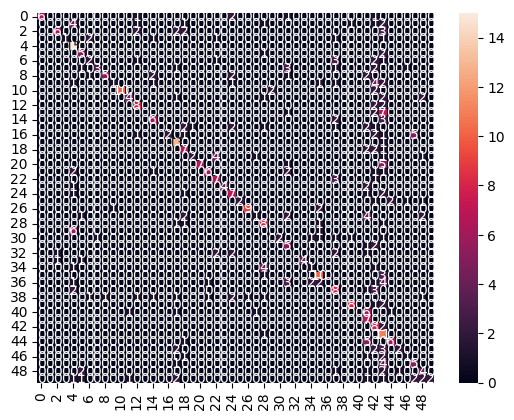

In [94]:
cm = confusion_matrix(np.argmax(Ytest, axis=1), np.argmax(res, axis=1))

sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Ytest, axis=1), np.argmax(res, axis=1)))

In [79]:
predict_class = np.argmax(predict, axis=1)
predict_class = predict_class.tolist()

2917

## Hyperparameter Tunning 2 1D CNN Layers

In [256]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D,
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','LeakyReLU'],default='selu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Choice('num_filters_1',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Choice('num_filters_2',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_3',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.7,default=0.25,step=0.05,)))
        model.add(Flatten())
        model.add(Dense(units=hp.Int('units',min_value=20,max_value=120,step=20,default=40),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.7,default=0.25,step=0.05,)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(Lion(hp.Float('learning_rate',min_value=1e-5,max_value=1e-3,sampling='LOG',default=1e-5)),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=(130,126), num_classes=50)

/tmp/ipykernel_198611/792044357.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [497]:
HYPERBAND_MAX_EPOCHS = 100
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='test4',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from hyperband/test4/tuner0.json


In [498]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'LeakyReLU'], 'ordered': False}
num_filters_1 (Choice)
{'default': 50, 'conditions': [], 'values': [25, 50, 100, 150], 'ordered': True}
num_filters_2 (Choice)
{'default': 50, 'conditions': [], 'values': [25, 50, 100, 150], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
units (Int)
{'default': 40, 'conditions': [], 'min_value': 20, 'max_value': 120, 'step': 20, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}


In [499]:
es = EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True)

In [48]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 254 Complete [00h 02m 53s]
val_loss: 2.798992872238159

Best val_loss So Far: 1.5037063360214233
Total elapsed time: 02h 34m 13s
INFO:tensorflow:Oracle triggered exit


In [500]:
tuner.results_summary()

Results summary
Results in hyperband/test4
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0245 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 100
num_filters_2: 25
dropout_1: 0.65
units: 40
dropout_2: 0.4
learning_rate: 0.00013960407115272237
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0242
Score: 1.5037063360214233

Trial 0208 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 50
num_filters_2: 100
dropout_1: 0.6000000000000001
units: 60
dropout_2: 0.6000000000000001
learning_rate: 0.00022015333534136284
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0207
Score: 2.004472494125366

Trial 0233 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 25
num_filters_2: 25
dropout_1: 0.30000000000000004
units: 80
dropout_2: 0.65
learning_rate: 0.00025224242614677007
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 2
tuner/round: 1
tune

In [501]:
bestHP = tuner.get_best_hyperparameters(num_trials=2)[1]

In [502]:
print("[INFO] training the best model...")
model = tuner.hypermodel.build(bestHP)
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=100, verbose=1)

[INFO] training the best model...
Epoch 1/100
28/28 [==============================] - 1s 32ms/step - loss: 5.5308 - accuracy: 0.0243 - val_loss: 3.8263 - val_accuracy: 0.0833
Epoch 2/100
28/28 [==============================] - 1s 27ms/step - loss: 4.3483 - accuracy: 0.0501 - val_loss: 3.5147 - val_accuracy: 0.1420
Epoch 3/100
28/28 [==============================] - 1s 29ms/step - loss: 3.8559 - accuracy: 0.0968 - val_loss: 3.2292 - val_accuracy: 0.2006
Epoch 4/100
28/28 [==============================] - 1s 27ms/step - loss: 3.4544 - accuracy: 0.1424 - val_loss: 3.0182 - val_accuracy: 0.2623
Epoch 5/100
28/28 [==============================] - 1s 27ms/step - loss: 3.1560 - accuracy: 0.1865 - val_loss: 2.7759 - val_accuracy: 0.3519
Epoch 6/100
28/28 [==============================] - 1s 27ms/step - loss: 2.9038 - accuracy: 0.2414 - val_loss: 2.5860 - val_accuracy: 0.3951
Epoch 7/100
28/28 [==============================] - 1s 28ms/step - loss: 2.7335 - accuracy: 0.2844 - val_loss: 2.

In [52]:
best_model = tuner.get_best_models(num_models=1)[0]

In [61]:
History = best_model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=500, verbose=1)

Epoch 1/500
28/28 [==============================] - 2s 17ms/step - loss: 1.1973 - accuracy: 0.6364 - val_loss: 1.6069 - val_accuracy: 0.6543
Epoch 2/500
28/28 [==============================] - 0s 15ms/step - loss: 1.1804 - accuracy: 0.6368 - val_loss: 1.6015 - val_accuracy: 0.6049
Epoch 3/500
28/28 [==============================] - 0s 15ms/step - loss: 1.1668 - accuracy: 0.6480 - val_loss: 1.6986 - val_accuracy: 0.6173
Epoch 4/500
28/28 [==============================] - 0s 15ms/step - loss: 1.2008 - accuracy: 0.6177 - val_loss: 1.6607 - val_accuracy: 0.6111
Epoch 5/500
28/28 [==============================] - 0s 15ms/step - loss: 1.1745 - accuracy: 0.6319 - val_loss: 1.6212 - val_accuracy: 0.6173
Epoch 6/500
28/28 [==============================] - 0s 15ms/step - loss: 1.1680 - accuracy: 0.6383 - val_loss: 1.5716 - val_accuracy: 0.6204
Epoch 7/500
28/28 [==============================] - 0s 16ms/step - loss: 1.1666 - accuracy: 0.6371 - val_loss: 1.4613 - val_accuracy: 0.6543
Epoch 

28/28 [==============================] - 0s 15ms/step - loss: 0.8847 - accuracy: 0.7156 - val_loss: 1.7174 - val_accuracy: 0.6358
Epoch 116/500
28/28 [==============================] - 0s 15ms/step - loss: 0.9036 - accuracy: 0.7100 - val_loss: 1.6745 - val_accuracy: 0.6389
Epoch 117/500
28/28 [==============================] - 0s 15ms/step - loss: 0.9146 - accuracy: 0.7100 - val_loss: 1.6302 - val_accuracy: 0.6852
Epoch 118/500
28/28 [==============================] - 0s 15ms/step - loss: 0.8746 - accuracy: 0.7294 - val_loss: 1.4993 - val_accuracy: 0.6728
Epoch 119/500
28/28 [==============================] - 0s 16ms/step - loss: 0.8975 - accuracy: 0.7134 - val_loss: 1.5081 - val_accuracy: 0.6821
Epoch 120/500
28/28 [==============================] - 0s 15ms/step - loss: 0.9008 - accuracy: 0.7111 - val_loss: 1.6858 - val_accuracy: 0.6698
Epoch 121/500
28/28 [==============================] - 0s 15ms/step - loss: 0.9219 - accuracy: 0.7104 - val_loss: 1.8443 - val_accuracy: 0.6235
Epoch 

Epoch 172/500
28/28 [==============================] - 0s 15ms/step - loss: 0.8254 - accuracy: 0.7298 - val_loss: 1.6094 - val_accuracy: 0.6821
Epoch 173/500
28/28 [==============================] - 0s 16ms/step - loss: 0.8408 - accuracy: 0.7351 - val_loss: 2.1210 - val_accuracy: 0.5617
Epoch 174/500
28/28 [==============================] - 0s 15ms/step - loss: 0.8103 - accuracy: 0.7354 - val_loss: 1.6483 - val_accuracy: 0.7037
Epoch 175/500
28/28 [==============================] - 0s 16ms/step - loss: 0.8149 - accuracy: 0.7365 - val_loss: 1.8927 - val_accuracy: 0.6420
Epoch 176/500
28/28 [==============================] - 0s 15ms/step - loss: 0.7995 - accuracy: 0.7384 - val_loss: 1.7119 - val_accuracy: 0.6420
Epoch 177/500
28/28 [==============================] - 0s 15ms/step - loss: 0.8509 - accuracy: 0.7328 - val_loss: 1.5842 - val_accuracy: 0.6698
Epoch 178/500
28/28 [==============================] - 0s 15ms/step - loss: 0.8482 - accuracy: 0.7283 - val_loss: 1.8628 - val_accuracy:

Epoch 229/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7591 - accuracy: 0.7410 - val_loss: 1.7798 - val_accuracy: 0.6636
Epoch 230/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7688 - accuracy: 0.7451 - val_loss: 1.8049 - val_accuracy: 0.6543
Epoch 231/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7679 - accuracy: 0.7608 - val_loss: 1.6894 - val_accuracy: 0.6852
Epoch 232/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7392 - accuracy: 0.7653 - val_loss: 1.7807 - val_accuracy: 0.6605
Epoch 233/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7773 - accuracy: 0.7515 - val_loss: 1.7914 - val_accuracy: 0.6636
Epoch 234/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7373 - accuracy: 0.7597 - val_loss: 1.9289 - val_accuracy: 0.6327
Epoch 235/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7769 - accuracy: 0.7560 - val_loss: 2.0037 - val_accuracy:

Epoch 286/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7167 - accuracy: 0.7713 - val_loss: 1.9682 - val_accuracy: 0.6451
Epoch 287/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7190 - accuracy: 0.7664 - val_loss: 1.9762 - val_accuracy: 0.6451
Epoch 288/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7686 - accuracy: 0.7500 - val_loss: 1.9480 - val_accuracy: 0.6605
Epoch 289/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7175 - accuracy: 0.7672 - val_loss: 1.9774 - val_accuracy: 0.6389
Epoch 290/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7338 - accuracy: 0.7564 - val_loss: 1.7772 - val_accuracy: 0.6451
Epoch 291/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7107 - accuracy: 0.7679 - val_loss: 1.6474 - val_accuracy: 0.6914
Epoch 292/500
28/28 [==============================] - 0s 16ms/step - loss: 0.7212 - accuracy: 0.7575 - val_loss: 1.7297 - val_accuracy:

Epoch 343/500
28/28 [==============================] - 0s 16ms/step - loss: 0.6997 - accuracy: 0.7720 - val_loss: 2.1009 - val_accuracy: 0.6080
Epoch 344/500
28/28 [==============================] - 0s 16ms/step - loss: 0.6925 - accuracy: 0.7724 - val_loss: 1.6792 - val_accuracy: 0.7006
Epoch 345/500
28/28 [==============================] - 0s 16ms/step - loss: 0.6749 - accuracy: 0.7806 - val_loss: 2.0945 - val_accuracy: 0.6265
Epoch 346/500
28/28 [==============================] - 0s 16ms/step - loss: 0.6950 - accuracy: 0.7750 - val_loss: 2.5844 - val_accuracy: 0.5710
Epoch 347/500
13/28 [============>.................] - ETA: 0s - loss: 0.6542 - accuracy: 0.7949

KeyboardInterrupt: 

In [504]:
res = model.predict(Xval)

11/11 [==============================] - 0s 3ms/step


In [506]:
loss, accuracy = model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 4ms/step - loss: 1.3734 - accuracy: 0.7469


In [507]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.86      1.00      0.92         6
           2       0.70      0.70      0.70        10
           3       1.00      0.70      0.82        10
           4       1.00      1.00      1.00         4
           5       0.88      0.88      0.88         8
           6       0.33      0.50      0.40         6
           7       0.80      1.00      0.89         8
           8       0.67      0.67      0.67         6
           9       0.43      1.00      0.60         6
          10       0.67      1.00      0.80         4
          11       0.83      0.83      0.83         6
          12       0.67      0.67      0.67         6
          13       0.57      0.50      0.53         8
          14       0.40      0.33      0.36         6
          15       0.62      0.62      0.62         8
          16       1.00      1.00      1.00         6
          17       1.00    

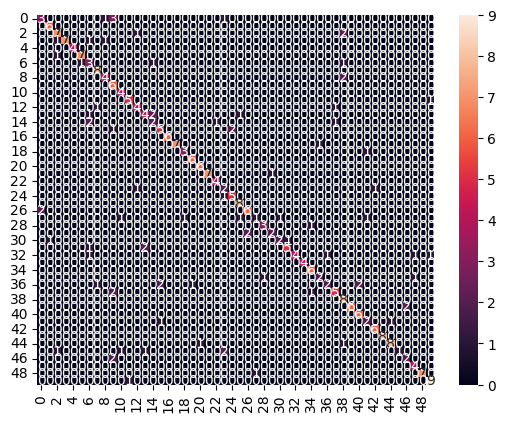

In [508]:
cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(res, axis=1))

sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(res, axis=1)))

In [509]:
np.argmax(res[11])

2

In [510]:
np.argmax(Yval[11])

2

In [511]:
np.argmax(res, axis=1)

array([ 0,  8, 23,  0,  1,  1,  1, 38,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        4,  4,  5,  2,  5,  5,  5,  6, 38,  7,  7,  7,  7,  8,  8,  8,  9,
        9,  9, 10, 10, 11, 11, 49, 12, 12, 37, 14, 25, 13, 13, 14, 22, 37,
        9, 15, 24, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20,
       20, 20, 29, 21, 21, 21, 22, 22, 23, 42, 24, 23, 24, 25, 25, 25, 25,
       26,  0, 26, 26, 18, 10, 25, 28, 28, 29, 26, 31, 30, 31,  6, 31, 31,
       47, 32, 32, 36, 33, 33, 34, 34, 34, 35, 28, 40, 15, 15,  7, 37, 37,
        9, 37, 38, 38, 38, 38, 46, 39, 39, 39, 40, 40, 40, 44, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 38, 44, 10, 23, 45, 46,  9, 47, 47,
       48, 48, 48, 48, 11, 49, 49, 49, 49,  9,  9,  9,  0,  1,  1,  1, 38,
       12,  2,  2,  2,  6,  3,  3,  3,  8,  4,  4,  5,  5,  5,  5, 14,  6,
        6,  7,  7,  7,  7, 38,  8, 38,  9,  9,  9, 10, 10, 11, 11, 11, 12,
       12,  7,  6, 14, 13, 13,  6,  6, 14, 15, 15, 24, 15, 16, 16, 16, 17,
       17, 35, 17, 41, 18

In [512]:
np.argmax(Yval, axis=1)

array([ 0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,
        9,  9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
       15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 31, 31,
       32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 36, 37, 37,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 46, 46, 47, 47,
       48, 48, 48, 48, 49, 49, 49, 49, 49,  0,  0,  0,  0,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 11, 11, 11, 12,
       12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17,
       17, 17, 17, 18, 18

TypeError: list.count() takes exactly one argument (0 given)

In [202]:
sequence.shape

AttributeError: 'list' object has no attribute 'shape'

In [152]:
Xtrain[0][10]

array([0.        , 0.        , 0.61430512, 0.        , 0.        ,
       0.39596278, 0.        , 0.        , 0.40874202, 0.        ,
       0.        , 0.40810024, 0.        , 0.        , 0.48266869,
       0.        , 0.        , 0.65779321, 0.        , 0.        ,
       0.81176704, 0.        , 0.        , 0.92339662, 0.        ,
       0.        , 0.96071672, 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.70816574, 0.        , 0.        , 0.30657587, 0.        ,
       0.        , 0.52645834, 0.        , 0.        , 0.65912

In [94]:
predictions

[42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42]

In [124]:
predictions

[]

In [130]:
sequence

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
trials = tuner.oracle.trials

# Print out the ID and the score of all trials
for trial_id, trial in trials.items():
    print(trial_id, trial.score)

# Return best 5 trials
best_trials = tuner.oracle.get_best_trials(num_trials=5)
for trial in best_trials:
    trial.summary()
    model2 = tuner.load_model(trial)
    # Do some stuff to the model

0000 3.898800849914551
0001 3.803058624267578
0002 3.886780858039856
0003 3.5405542850494385
0004 3.8846980333328247
0005 3.9728771448135376
0006 3.5900771617889404
0007 3.9532002210617065
0008 3.938177227973938
0009 4.048365831375122
0010 3.615102171897888
0011 3.7522424459457397
0012 3.909103274345398
0013 3.9027684926986694
0014 3.885507822036743
0015 3.9257211685180664
0016 3.282256007194519
0017 3.7758527994155884
0018 3.873215436935425
0019 3.8949038982391357
0020 3.8801382780075073
0021 3.788564443588257
0022 3.5741392374038696
0023 3.3994975090026855
0024 3.911440849304199
0025 3.7547767162323
0026 4.029992580413818
0027 3.9448060989379883
0028 3.910792350769043
0029 3.740312933921814
0030 3.8987677097320557
0031 3.4418601989746094
0032 3.28007972240448
0033 3.9038991928100586
0034 3.888121247291565
0035 3.936005473136902
0036 3.3792749643325806
0037 3.713937997817993
0038 3.5628620386123657
0039 3.688674569129944
0040 3.908714771270752
0041 3.925951600074768
0042 3.90328323841

Trial 0233 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 25
num_filters_2: 25
dropout_1: 0.30000000000000004
units: 80
dropout_2: 0.65
learning_rate: 0.00025224242614677007
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0216
Score: 2.0138278007507324
Trial 0207 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 50
num_filters_2: 100
dropout_1: 0.6000000000000001
units: 60
dropout_2: 0.6000000000000001
learning_rate: 0.00022015333534136284
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0199
Score: 2.0394604206085205
Trial 0229 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 50
num_filters_2: 50
dropout_1: 0.55
units: 80
dropout_2: 0.1
learning_rate: 0.00021979153094558063
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0213
Score: 2.0706980228424072


In [112]:
loss, accuracy = reconstructed_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 4ms/step - loss: 2.0496 - accuracy: 0.6358


In [141]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 4ms/step - loss: 2.0496 - accuracy: 0.6358


In [513]:
import matplotlib.pyplot as plt

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(best_model.history['loss'])
plt.plot(best_model.history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable

In [235]:
best_model.save("best_model")

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


In [61]:
reconstructed_model = tf.keras.models.load_model("best_model")

In [240]:
reconstructed_model.history()

TypeError: 'History' object is not callable

In [172]:
cv2.destroyAllWindows()
cap.release()

## Realtime Code Prediction 

In [121]:
path = '/home/kristian/ASL_Citizen/videos/0525121513125173-DARK.mp4'
cap = cv2.VideoCapture(path)
#cap = cv2.VideoCapture(0)
print(frames_from_file(path))

sequence = [np.zeros(126)] * 130  # Initialize with 130 zero-filled sequences
predictions = []

with mp_holistic.Holistic(static_image_mode=False,
                          model_complexity=1) as holistic:
    while True:
        ret, frame = cap.read()
        if ret == False:
            break
            
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(frame_rgb)
        # Left hand
        mp_drawing.draw_landmarks(
            frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))

        # Right Hand
        mp_drawing.draw_landmarks(
            frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))
                # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence.pop(0)  # Remove the oldest element
        
        if len(sequence) == 130:
            res = reconstructed_model.predict(np.expand_dims(sequence, axis=0))[0]
            print(np.argmax(res))
            predictions.append(np.argmax(res))
            
        frame = cv2.flip(frame, 1)
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

(114, 30, 4)
1/1 [==============================] - 0s 16ms/step
42
1/1 [==============================] - 0s 16ms/step
42
1/1 [==============================] - 0s 14ms/step
42
1/1 [==============================] - 0s 14ms/step
42
1/1 [==============================] - 0s 17ms/step
42
1/1 [==============================] - 0s 15ms/step
42
1/1 [==============================] - 0s 15ms/step
42
1/1 [==============================] - 0s 20ms/step
42
1/1 [==============================] - 0s 14ms/step
18
1/1 [==============================] - 0s 16ms/step
5
1/1 [==============================] - 0s 15ms/step
46
1/1 [==============================] - 0s 15ms/step
46
1/1 [==============================] - 0s 15ms/step
46
1/1 [==============================] - 0s 14ms/step
46
1/1 [==============================] - 0s 17ms/step
46
1/1 [==============================] - 0s 17ms/step
42
1/1 [==============================] - 0s 16ms/step
42
1/1 [==============================] - 0s 18ms/step
4

In [50]:
#path = valdf.Path[9]
path = '/home/kristian/ASL_Citizen/videos/0525121513125173-DARK.mp4'

path
cap = cv2.VideoCapture(path)
#cap = cv2.VideoCapture(0)
print(frames_from_file(path))

sequence = [np.zeros(126)] * 130  # Initialize with 130 zero-filled sequences
predictions = []
threshold = .5

with mp_holistic.Holistic(static_image_mode=False,
                          model_complexity=1) as holistic:
    while True:
        ret, frame = cap.read()
        if ret == False:
            break
            
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(frame_rgb)
        # Left hand
        mp_drawing.draw_landmarks(
            frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))

        # Right Hand
        mp_drawing.draw_landmarks(
            frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 0, 0),
                                   thickness=2,
                                   circle_radius=1),
            mp_drawing.DrawingSpec(color=(0, 92, 230), thickness=2))
                # 2. Prediction logic
            
            # Open the video file
        # Initialize an empty list to store the keypoints for each frame
        keypoints = []
        sequence.append(extract_keypoints(results))
        sequence.pop(0)  # Remove the oldest element
        sequence = np.array(sequence)
        sequence = sequence.reshape(1, -1)
        sequence=scaler.transform(sequence).reshape(130, 126)
        sequence = sequence.tolist()
        if len(sequence) == 130:
            
            res = best_model.predict(np.expand_dims(sequence, axis=0))[0]
            if res[np.argmax(res)] > threshold:
                print(np.argmax(res))
                predictions.append(np.argmax(res))
            
        frame = cv2.flip(frame, 1)
        cv2.imshow("Frame", frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

(114, 30, 4)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


1/1 [==============================] - 0s 19ms/step
30
1/1 [==============================] - 0s 19ms/step
30
1/1 [==============================] - 0s 19ms/step
30
1/1 [==============================] - 0s 18ms/step
30
1/1 [==============================] - 0s 22ms/step
39
1/1 [==============================] - 0s 19ms/step


/home/kristian/miniconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:1013: RuntimeWarning: overflow encountered in divide
  X /= self.scale_


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [443]:
sequence = np.array(sequence)
sequence = sequence.reshape(1, -1)
sequence.shape

(1, 16380)

In [293]:
predictions

[]

In [234]:
valdf.Path.tail()

157    file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...
158    file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...
159    file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...
160    file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...
161    file:///media/kristian/HDD/ASL_Citizen/ASL_Cit...
Name: Path, dtype: object

In [492]:
sequence

array([[-1.13346792e+049, -3.22915747e+046,  2.01043630e+293, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000]])

In [396]:
scaler.fit_transform(sequence).reshape(130, 126)

array([[-0.80275307, -0.76500565,  0.15641896, ..., -0.79544123,
        -0.6547425 ,  0.61363025],
       [-0.80275307, -0.76500565,  0.15641896, ..., -0.79544123,
        -0.6547425 ,  0.61363025],
       [-0.80275307, -0.76500565,  0.15641896, ..., -0.79544123,
        -0.6547425 ,  0.61363025],
       ...,
       [-0.80275307, -0.76500565,  0.15641896, ..., -0.79544123,
        -0.6547425 ,  0.61363025],
       [-0.80275307, -0.76500565,  0.15641896, ..., -0.79544123,
        -0.6547425 ,  0.61363025],
       [-0.80275307, -0.76500565,  0.15641896, ..., -0.79544123,
        -0.6547425 ,  0.61363025]])

In [325]:
act_function = 'selu'
model = Sequential(name='sequential')
model.add(Conv1D(filters=100,kernel_size=2,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=25,kernel_size=2,activation=act_function))
model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_3',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(.65))
model.add(Flatten())
model.add(Dense(units=40,activation=act_function))
model.add(Dropout(.4))
model.add(Dense(50, activation='softmax'))

model.compile(Lion(learning_rate=0.00013960407115272237),
           loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 129, 100)          25300     
                                                                 
 max_pooling1d_28 (MaxPooli  (None, 64, 100)           0         
 ng1D)                                                           
                                                                 
 conv1d_29 (Conv1D)          (None, 63, 25)            5025      
                                                                 
 max_pooling1d_29 (MaxPooli  (None, 31, 25)            0         
 ng1D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 31, 25)            0         
                                                                 
 flatten_14 (Flatten)        (None, 775)               0

In [316]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(2)
   tf.random.set_seed(2)
   np.random.seed(2)
  # random.seed(2)

In [326]:
tf.random.set_seed(10)

In [317]:
reset_random_seeds()

In [327]:
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=5, verbose=1,)

Epoch 1/5
28/28 [==============================] - 1s 32ms/step - loss: 4.6835 - accuracy: 0.0217 - val_loss: 3.9621 - val_accuracy: 0.0247
Epoch 2/5
28/28 [==============================] - 1s 28ms/step - loss: 4.1676 - accuracy: 0.0262 - val_loss: 3.9453 - val_accuracy: 0.0185
Epoch 3/5
28/28 [==============================] - 1s 29ms/step - loss: 4.0481 - accuracy: 0.0258 - val_loss: 3.8856 - val_accuracy: 0.0309
Epoch 4/5
28/28 [==============================] - 1s 28ms/step - loss: 3.9564 - accuracy: 0.0321 - val_loss: 3.8553 - val_accuracy: 0.0309
Epoch 5/5
28/28 [==============================] - 1s 27ms/step - loss: 3.8901 - accuracy: 0.0362 - val_loss: 3.8133 - val_accuracy: 0.0679


In [324]:
loss, accuracy = model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 4ms/step - loss: 3.7301 - accuracy: 0.0710


## Test 2 1D CNN Layers + 3 GRU Layers

In [71]:
act_function = 'selu'
model = Sequential(name='sequential')
model.add(Conv1D(filters=100,kernel_size=2,activation=act_function,input_shape=(130,126)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=25,kernel_size=2,activation=act_function))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(200,return_sequences=True))
model.add(GRU(150,return_sequences=True))
model.add(GRU(100))
#model.add(Dropout(.65))
model.add(Flatten())
model.add(Dense(units=40,activation=act_function))
#model.add(Dropout(.4))
model.add(Dense(50, activation='softmax'))

model.compile(Adam(learning_rate=0.00013960407115272237),
           loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

2023-08-14 20:37:06.427091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 20:37:06.511630: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 129, 100)          25300     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 100)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 25)            5025      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 25)           0         
 1D)                                                             
                                                                 
 gru (GRU)                   (None, 31, 200)           136200    
                                                                 
 gru_1 (GRU)                 (None, 31, 150)           1

In [72]:
History = model.fit(x=Xtrain, y=Ytrain,validation_data= (Xval,Yval), batch_size=96,epochs=100, verbose=1,)

Epoch 1/100


2023-08-14 20:37:13.306297: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600


 3/28 [==>...........................] - ETA: 1s - loss: 3.9259 - accuracy: 0.0104  

2023-08-14 20:37:13.708933: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


27/28 [===========================>..] - ETA: 0s - loss: 3.8909 - accuracy: 0.0289

2023-08-14 20:37:14.996487: W tensorflow/core/common_runtime/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


28/28 [==============================] - 6s 97ms/step - loss: 3.8902 - accuracy: 0.0295 - val_loss: 3.8455 - val_accuracy: 0.0710
Epoch 2/100
28/28 [==============================] - 1s 46ms/step - loss: 3.7943 - accuracy: 0.0587 - val_loss: 3.7558 - val_accuracy: 0.0556
Epoch 3/100
28/28 [==============================] - 1s 45ms/step - loss: 3.6468 - accuracy: 0.0960 - val_loss: 3.5845 - val_accuracy: 0.0741
Epoch 4/100
28/28 [==============================] - 1s 46ms/step - loss: 3.4421 - accuracy: 0.1218 - val_loss: 3.3840 - val_accuracy: 0.1142
Epoch 5/100
28/28 [==============================] - 1s 47ms/step - loss: 3.2252 - accuracy: 0.1547 - val_loss: 3.1885 - val_accuracy: 0.1698
Epoch 6/100
28/28 [==============================] - 1s 47ms/step - loss: 3.0401 - accuracy: 0.1913 - val_loss: 3.0267 - val_accuracy: 0.2130
Epoch 7/100
28/28 [==============================] - 1s 47ms/step - loss: 2.8665 - accuracy: 0.2496 - val_loss: 2.8554 - val_accuracy: 0.2901
Epoch 8/100
28/28 

KeyboardInterrupt: 

In [73]:
loss, accuracy = model.evaluate(Xval, Yval)

11/11 [==============================] - 0s 14ms/step - loss: 1.1285 - accuracy: 0.7469


In [74]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

11/11 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      0.67      0.80         6
           2       0.83      1.00      0.91        10
           3       1.00      0.50      0.67        10
           4       0.80      1.00      0.89         4
           5       0.80      1.00      0.89         8
           6       0.50      1.00      0.67         6
           7       0.70      0.88      0.78         8
           8       0.71      0.83      0.77         6
           9       0.71      0.83      0.77         6
          10       1.00      1.00      1.00         4
          11       0.75      1.00      0.86         6
          12       1.00      0.67      0.80         6
          13       0.83      0.62      0.71         8
          14       0.67      0.33      0.44         6
          15       0.83      0.62      0.71         8
          16       0.86     

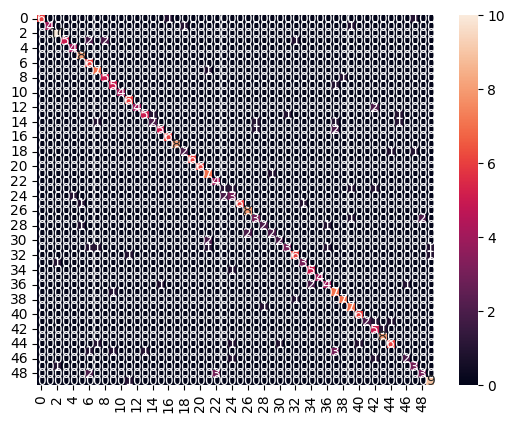

In [75]:
cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1))

sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(model.predict(Xval), axis=1)))

In [488]:
np.argmax(model.predict(Xval), axis=1)

11/11 [==============================] - 0s 21ms/step


array([ 0, 44,  0,  0, 39,  1,  1,  2,  2,  2,  2,  2,  6,  3,  3,  3,  3,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8, 33,  9,
       42, 45, 10, 10, 11, 11, 11, 12, 12, 42, 31, 13, 13, 13, 45,  6, 14,
       15, 15, 37, 15, 16, 16, 16, 17, 17, 17, 17, 45, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 24, 42, 24, 18, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27, 28, 28, 29, 26, 41, 30, 31, 48, 31, 31,
       11, 32, 49, 32, 33, 33, 34, 34, 34, 35, 35, 36, 28, 15, 36, 37, 21,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 18, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 40, 44,  6, 34, 45,  5, 18, 47, 47,
       22, 48,  3, 48, 49, 49, 11, 49, 49,  0,  2,  0,  0,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  6,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  0,  9, 18, 42, 10, 10, 11, 11, 11, 12,
       12, 42, 14,  9, 31, 13, 14,  6, 14, 15, 15, 22, 15, 16, 16, 16, 17,
       17, 17, 17, 28, 18

In [489]:
np.argmax(Yval, axis=1)

array([ 0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,
        9,  9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
       15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 31, 31,
       32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 36, 37, 37,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 46, 46, 47, 47,
       48, 48, 48, 48, 49, 49, 49, 49, 49,  0,  0,  0,  0,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 11, 11, 11, 12,
       12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17,
       17, 17, 17, 18, 18

## Hyperparameter Tunning 2 1D CNN Layers + 3 GRU

In [72]:
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping


/tmp/ipykernel_338231/1657225157.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


NameError: name 'hypermodel' is not defined

In [36]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','LeakyReLU'],default='selu')
        model = Sequential()
        model.add(Conv1D(filters=hp.Choice('num_filters_1',values=[25,50, 100,150],default=100,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=hp.Choice('num_filters_2',values=[25,50, 100,150],default=25,),kernel_size=2,activation=act_function))
        model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_3',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))
        model.add(GRU(units=hp.Int('units_1',min_value=50,max_value=200,step=50,default=200),return_sequences=True))
        model.add(GRU(units=hp.Int('units_2',min_value=50,max_value=200,step=50,default=150),return_sequences=True))
        model.add(GRU(units=hp.Int('units_3',min_value=50,max_value=200,step=50,default=100),return_sequences=True))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.7,default=0.65,step=0.05,)))
        model.add(Flatten())
        model.add(Dense(units=hp.Int('units_4',min_value=20,max_value=120,step=20,default=40),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.7,default=0.0,step=0.05,)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(Adam(hp.Float('learning_rate',min_value=1e-5,max_value=1e-3,sampling='LOG',default=0.00013960407115272237)),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=(130,126), num_classes=50)

/tmp/ipykernel_7167/2984174869.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [37]:
HYPERBAND_MAX_EPOCHS = 100
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='CNN-3GRU',
    overwrite=False)

INFO:tensorflow:Reloading Tuner from hyperband/CNN-3GRU/tuner0.json


In [38]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'LeakyReLU'], 'ordered': False}
num_filters_1 (Choice)
{'default': 100, 'conditions': [], 'values': [25, 50, 100, 150], 'ordered': True}
num_filters_2 (Choice)
{'default': 25, 'conditions': [], 'values': [25, 50, 100, 150], 'ordered': True}
units_1 (Int)
{'default': 200, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
units_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
units_3 (Int)
{'default': 100, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
units_4 (Int)
{'default': 40, 'conditions': [], 'min_value': 20, 'max_value': 120, 'step': 20, 'sampling': 'linear'}
dropout_2 (Float)
{'default'

In [39]:
es = EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True)

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
tuner.search(Xtrain, Ytrain, epochs=1000, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 254 Complete [00h 01m 59s]
val_loss: 1.052487075328827

Best val_loss So Far: 0.6821039021015167
Total elapsed time: 03h 47m 27s
INFO:tensorflow:Oracle triggered exit


In [42]:
best_model = tuner.get_best_models(num_models=1)[0]

In [43]:
tuner.results_summary()

Results summary
Results in hyperband/CNN-3GRU
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0146 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 150
num_filters_2: 100
units_1: 150
units_2: 200
units_3: 100
dropout_1: 0.05
units_4: 80
dropout_2: 0.65
learning_rate: 0.000542887094068396
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0142
Score: 0.6821039021015167

Trial 0142 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 150
num_filters_2: 100
units_1: 150
units_2: 200
units_3: 100
dropout_1: 0.05
units_4: 80
dropout_2: 0.65
learning_rate: 0.000542887094068396
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0137
Score: 0.6831367909908295

Trial 0247 summary
Hyperparameters:
dense_activation: selu
num_filters_1: 100
num_filters_2: 50
units_1: 100
units_2: 200
units_3: 200
dropout_1: 0.05
units_4: 100
dropout_2: 0.65
learning_rate: 0.00011948110879

In [44]:
loss, accuracy = best_model.evaluate(Xval, Yval)

11/11 [==============================] - 2s 20ms/step - loss: 0.6821 - accuracy: 0.8333


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

11/11 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.80      0.67      0.73         6
           2       0.91      1.00      0.95        10
           3       0.88      0.70      0.78        10
           4       1.00      1.00      1.00         4
           5       0.67      1.00      0.80         8
           6       0.45      0.83      0.59         6
           7       1.00      0.88      0.93         8
           8       1.00      0.33      0.50         6
           9       1.00      0.83      0.91         6
          10       1.00      1.00      1.00         4
          11       0.83      0.83      0.83         6
          12       0.80      0.67      0.73         6
          13       1.00      0.75      0.86         8
          14       0.55      1.00      0.71         6
          15       0.86      0.75      0.80         8
          16       0.86    

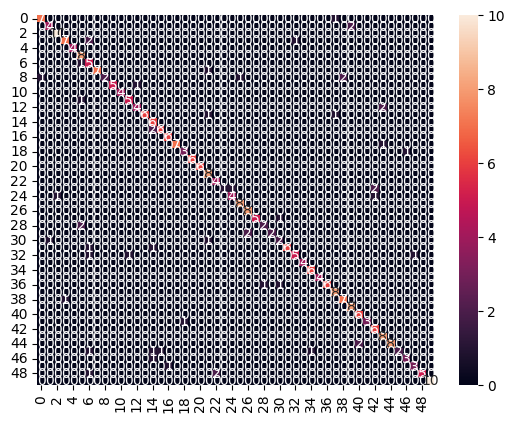

In [46]:
cm = confusion_matrix(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1))

sns.heatmap(cm, annot = True)

print(classification_report(np.argmax(Yval, axis=1), np.argmax(best_model.predict(Xval), axis=1)))

In [47]:
np.argmax(best_model.predict(Xval), axis=1)

11/11 [==============================] - 0s 10ms/step


array([ 0, 37,  0,  0, 39,  1,  1,  2,  2,  2,  2,  2,  6,  3,  3,  3, 32,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7, 25,  8,  0,  9,
        9,  9, 10, 10, 11, 11, 11, 12, 12, 43, 21, 13, 13, 13, 14, 14, 14,
       15, 15, 14, 15, 16, 16, 16, 17, 17, 17, 17, 46, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 24, 42, 24, 42, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27,  5, 28, 29, 26, 21, 30, 31,  6, 31, 31,
       47, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 36, 37, 37,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 18, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 40, 44, 45, 15,  6, 14, 46, 47, 47,
       22, 48,  6, 48, 49, 49, 49, 49, 49,  0,  0,  0,  0, 39,  1,  1,  2,
        2,  2,  2,  2,  6,  3,  3,  3,  3,  4,  4,  5,  5,  5,  5,  5,  6,
        6, 21,  7,  7,  7, 38,  8, 38,  9, 12,  9, 10, 10, 11, 11,  5, 12,
       12, 43, 13, 37, 13, 13, 14, 14, 14, 15, 15, 14, 15, 16, 16, 16, 17,
       17, 43, 17, 18, 18

In [48]:
np.argmax(Yval, axis=1)

array([ 0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,
        9,  9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
       15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 31, 31,
       32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 36, 37, 37,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 46, 46, 47, 47,
       48, 48, 48, 48, 49, 49, 49, 49, 49,  0,  0,  0,  0,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 11, 11, 11, 12,
       12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17,
       17, 17, 17, 18, 18

## Hyperparameter Tuning 3 GRU Layers

In [71]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','LeakyReLU','elu','gelu'],default='selu')
        model = Sequential()
#        model.add(Conv1D(filters=hp.Choice('num_filters_1',values=[25,50, 100,150],default=100,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_2',values=[25,50, 100,150],default=25,),kernel_size=2,activation=act_function))
#        model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_3',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))
        model.add(GRU(units=hp.Int('units_1',min_value=1,max_value=200,step=50,default=200),return_sequences=True, input_shape=self.input_shape))
        model.add(GRU(units=hp.Int('units_2',min_value=1,max_value=200,step=50,default=150),return_sequences=True))
        model.add(GRU(units=hp.Int('units_3',min_value=1,max_value=200,step=50,default=100),return_sequences=False))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.7,default=0.65,step=0.05,)))
 #       model.add(Flatten())
        model.add(Dense(units=hp.Int('units_4',min_value=20,max_value=120,step=20,default=40),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.7,default=0.0,step=0.05,)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(Adam(hp.Float('learning_rate',min_value=1e-5,max_value=1e-3,sampling='LOG',default=0.00013960407115272237)),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=(130,126), num_classes=50)

/tmp/ipykernel_64262/3598984445.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [72]:
HYPERBAND_MAX_EPOCHS = 100
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='GRU',
    overwrite=False)

2023-08-15 06:49:27.726689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 06:49:27.787802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [73]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'LeakyReLU', 'elu', 'gelu'], 'ordered': False}
units_1 (Int)
{'default': 200, 'conditions': [], 'min_value': 1, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
units_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 1, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
units_3 (Int)
{'default': 100, 'conditions': [], 'min_value': 1, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
units_4 (Int)
{'default': 40, 'conditions': [], 'min_value': 20, 'max_value': 120, 'step': 20, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.00013960407115272237, 'conditions': [], 'min_value': 1e-05, 'max_

In [74]:
es = EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True)

In [75]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
tuner.search(Xtrain, Ytrain, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 160 Complete [00h 00m 45s]
val_loss: 3.910211682319641

Best val_loss So Far: 1.9025814533233643
Total elapsed time: 01h 57m 10s


In [488]:
np.argmax(best_model.predict(Xval), axis=1)

11/11 [==============================] - 0s 21ms/step


array([ 0, 44,  0,  0, 39,  1,  1,  2,  2,  2,  2,  2,  6,  3,  3,  3,  3,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8, 33,  9,
       42, 45, 10, 10, 11, 11, 11, 12, 12, 42, 31, 13, 13, 13, 45,  6, 14,
       15, 15, 37, 15, 16, 16, 16, 17, 17, 17, 17, 45, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 24, 42, 24, 18, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27, 28, 28, 29, 26, 41, 30, 31, 48, 31, 31,
       11, 32, 49, 32, 33, 33, 34, 34, 34, 35, 35, 36, 28, 15, 36, 37, 21,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 18, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 40, 44,  6, 34, 45,  5, 18, 47, 47,
       22, 48,  3, 48, 49, 49, 11, 49, 49,  0,  2,  0,  0,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  6,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  0,  9, 18, 42, 10, 10, 11, 11, 11, 12,
       12, 42, 14,  9, 31, 13, 14,  6, 14, 15, 15, 22, 15, 16, 16, 16, 17,
       17, 17, 17, 28, 18

In [489]:
np.argmax(Yval, axis=1)

array([ 0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,
        9,  9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
       15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 31, 31,
       32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 36, 37, 37,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 46, 46, 47, 47,
       48, 48, 48, 48, 49, 49, 49, 49, 49,  0,  0,  0,  0,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 11, 11, 11, 12,
       12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17,
       17, 17, 17, 18, 18

## Hyperparameter Tuning 3 LSTM Layers

In [71]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, GRU
from keras_tuner import HyperModel
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        act_function = hp.Choice('dense_activation',values=['selu','LeakyReLU','elu','gelu'],default='selu')
        model = Sequential()
#        model.add(Conv1D(filters=hp.Choice('num_filters_1',values=[25,50, 100,150],default=100,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_2',values=[25,50, 100,150],default=25,),kernel_size=2,activation=act_function))
#        model.add(MaxPooling1D(pool_size=2))
#        model.add(Conv1D(filters=hp.Choice('num_filters_3',values=[25,50, 100,150],default=50,),kernel_size=2,activation=act_function,input_shape=self.input_shape))
#        model.add(MaxPooling1D(pool_size=2))
        model.add(LSTM(units=hp.Int('units_1',min_value=1,max_value=200,step=50,default=200),return_sequences=True, input_shape=self.input_shape))
        model.add(LSTM(units=hp.Int('units_2',min_value=1,max_value=200,step=50,default=150),return_sequences=True))
        model.add(LSTM(units=hp.Int('units_3',min_value=1,max_value=200,step=50,default=100),return_sequences=False))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.7,default=0.65,step=0.05,)))
 #       model.add(Flatten())
        model.add(Dense(units=hp.Int('units_4',min_value=20,max_value=120,step=20,default=40),activation=act_function))
        model.add(Dropout(rate=hp.Float('dropout_2',min_value=0.0,max_value=0.7,default=0.0,step=0.05,)))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(Adam(hp.Float('learning_rate',min_value=1e-5,max_value=1e-3,sampling='LOG',default=0.00013960407115272237)),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = CNNHyperModel(input_shape=(130,126), num_classes=50)

/tmp/ipykernel_64262/3598984445.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [72]:
HYPERBAND_MAX_EPOCHS = 100
#MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=10,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='GRU',
    overwrite=False)

2023-08-15 06:49:27.726689: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 06:49:27.787802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1739 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:01:00.0, compute capability: 6.1


In [73]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
dense_activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'LeakyReLU', 'elu', 'gelu'], 'ordered': False}
units_1 (Int)
{'default': 200, 'conditions': [], 'min_value': 1, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
units_2 (Int)
{'default': 150, 'conditions': [], 'min_value': 1, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
units_3 (Int)
{'default': 100, 'conditions': [], 'min_value': 1, 'max_value': 200, 'step': 50, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.65, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
units_4 (Int)
{'default': 40, 'conditions': [], 'min_value': 20, 'max_value': 120, 'step': 20, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.7, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.00013960407115272237, 'conditions': [], 'min_value': 1e-05, 'max_

In [74]:
es = EarlyStopping(monitor="val_loss",patience=20,restore_best_weights=True)

In [75]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
tuner.search(Xtrain, Ytrain, validation_data=(Xval,Yval),batch_size=96,callbacks=[es])

Trial 160 Complete [00h 00m 45s]
val_loss: 3.910211682319641

Best val_loss So Far: 1.9025814533233643
Total elapsed time: 01h 57m 10s


In [488]:
np.argmax(best_model.predict(Xval), axis=1)

11/11 [==============================] - 0s 21ms/step


array([ 0, 44,  0,  0, 39,  1,  1,  2,  2,  2,  2,  2,  6,  3,  3,  3,  3,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8, 33,  9,
       42, 45, 10, 10, 11, 11, 11, 12, 12, 42, 31, 13, 13, 13, 45,  6, 14,
       15, 15, 37, 15, 16, 16, 16, 17, 17, 17, 17, 45, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 24, 42, 24, 18, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27, 28, 28, 29, 26, 41, 30, 31, 48, 31, 31,
       11, 32, 49, 32, 33, 33, 34, 34, 34, 35, 35, 36, 28, 15, 36, 37, 21,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 18, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 40, 44,  6, 34, 45,  5, 18, 47, 47,
       22, 48,  3, 48, 49, 49, 11, 49, 49,  0,  2,  0,  0,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  6,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  0,  9, 18, 42, 10, 10, 11, 11, 11, 12,
       12, 42, 14,  9, 31, 13, 14,  6, 14, 15, 15, 22, 15, 16, 16, 16, 17,
       17, 17, 17, 28, 18

In [489]:
np.argmax(Yval, axis=1)

array([ 0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  9,
        9,  9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
       15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 25,
       26, 26, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 31, 31,
       32, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 36, 36, 36, 36, 37, 37,
       37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 41, 42, 42,
       42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 46, 46, 47, 47,
       48, 48, 48, 48, 49, 49, 49, 49, 49,  0,  0,  0,  0,  1,  1,  1,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 11, 11, 11, 12,
       12, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17,
       17, 17, 17, 18, 18